# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
# VISITING LONDON CITY

## Applied Data Science Capstone by IBM/Coursera. Author: Jorge Alvarez

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#business)
* [Data](#data)
* [Methodology](#methodology)
* [Explanatory Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

**London** is the capital and largest city of England and the United Kingdom. Its estimated mid-2018 municipal population (corresponding to Greater London) was roughly 9 million, which made it the third-most populous city in Europe. London accounts for 13.4% of the U.K. population. Greater London Built-up Area is the fourth-most populous in Europe with 9,787,426 inhabitants at the 2011 census.

London has been one of the world's top tourism cities for many years, and a key gateway for domestic and international visitors. The total number of visitors in London, including domestic tourists, is estimated at 12 million per year. 

As a result, tourism is the second most important sector for the economy of the city after financial services, contributing 12% to its GDP. Tourism, therefore, plays a vital role for London. The sector employs 700,000 people and contributes £36 billion a year to the economy. Tourism also helps to strengthen London's reputation as an open and welcoming global city.

## 2. Business Problem <a name="business"></a>

London is a world tourist destination with many visitors each year. The information available concerning tourism in London can be overwhelming and considering trips made to London for holiday purposes lasted 4.8 nights on average in 2019, according to Statista, a good planning is necessary to make the most of the holidays, avoiding downtimes. London has full potential to become the best city to visit in Europe but it still has challenges for visitors such as not using public transport wisely, waiting in long queues as a result of a poor planning and failing to research available attractions.

This project will analyse the venues available for people visiting London in order to look for the best recreational activities and locations in the variety of districts in London city. The venues will be analyzed first as a whole and structured afterwards by district for a better comprehension as well.

This project will be interesting to visitors and expats who are considering visiting and relocating to London as they will be able to identify the most attractive locations in London and explore its districts and common venues around each district.

## 3. Data <a name="data"></a>

This section describes the data that will be used to solve the problem concerning the tourism and visits to London city.

### 3.1. Libraries

The libraries installed and imported to be used in this project are summarized below:

* Numpy: Library to handle data in a vectorized manner. It is used to create cluster labels during the clustering stage.

* Pandas: Library for data analysis. In this project is used to build DataFrames containing Postal Codes, districts, venues, latitudes, longitudes.

* Requests: Library to handle requests. It is used to scrape the list of Postal Codes in London city from Milesfaster website (please, refer to sources section below).

* BeautifulSoup: Library used for pulling data out of html and XML files. It is necessary to scrape information from web pages.

* Geopy: Library used to convert an address into latitude and latitude values. It is used to add the latitudes and longitudes to the districts scraped.

* Json: Library to handle JSON files. In this project is used to make the GET request during the neighborhood exploration stage.

* folium: Library used to create maps. It is used to create maps in London city, containing all districts previously scraped.

* matplotlib.pyplot: Library used to plot bar plots.

* Matplotlib.cm and Matplotlib.colors: Library used to plot a range of colors in London city maps.

* WordCloud: Library used to plot a world cloud containing the most common venues in each district.

* k-means: Library used to apply k-means clustering algorithm used to cluster districts in London city.

### 3.2. Data Acquisition

The data acquired for this project contains the following columns:

* Postal Code: Contains the postal codes of London city that have the following coding. C: Central, N: North, E: East, W: West, SE: South East, SW: South West, NE: North East, NW: North West.

* District: London city districts within a Postal Code.

* Postal Code Latitude: Latitude of a given Postal Code in London city.

* Postal Code Longitude: Longitude of a given Postal Code in London city.

* Venue: Venue names within a district in London city.

* Venue Latitude: Latitude of a given venue in London city.

* Venue Longitude: Longitude of a given venue in London city.

* Venue Category: Category of a given venue (such as bakery, coffee shop, movie theater, etc.)

* Most common venue: The most common venue within a district ranging from 1st to 10th.

### 3.3. Data sources

For this project the following data and sources will be used:

* **Milesfaster website** This is a London Hotels specialist website which contains the postal codes and districts of London city. The postal codes and district data of London city will be scraped from Milesfaster using the beautiful soup library of Python, however, it requires an additional data cleaning step to reorganize and label columns. Milesfaster url is the following: https://www.milesfaster.co.uk/london-postcodes-list.htm


* **ArcGIS** Geocoding is the computational process of transforming a physical address description to a location on the Earth's surface (spatial representation in numerical coordinates). ArcGIS will be used to turn addresses into coordinates, finding addresses interactively and geocoding a table of addresses.


* **Foursquare API** to get the most common venues of given district in London city. Foursquare API has one of the largest database of 105+ million places and is used by over 1250,000 developers. It provides different data information of venues among districts. Foursquare data contains venues, longitude, latitude and postal codes. The information obtained per venue as follows: district, district latitude, district longitude, venue name, venue latitude, venue longitude, venue category. This will be used in the methodology section.

#### Installing and importing libraries

Before exploring the data, the necessary libraries will be installed and imported.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# install and import geocoder
!pip -q install geocoder
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas DataFrame

!pip install beautifulsoup4
from bs4 import BeautifulSoup # import BeautifulSoup library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# install wordcloud
!conda install -c conda-forge wordcloud==1.8.1 --yes

# import wordcloud and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries installed and imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries installed and imported.


### 3.4. Scraping the list of postal codes in London city dataset from Milesfaster website

The raw data is extracted from Milesfaster website, then processed parsing the html document and finally converted into a DataFrame.

In [2]:
# reading the Milesfaster website content of the server's response
url='https://www.milesfaster.co.uk/london-postcodes-list.htm'
response = requests.get(url)

# parsing the html document from the Milesfaster website using BeautifulSoup library
data = response.text
London_data = BeautifulSoup(data, 'html.parser')
milesfaster_table = London_data.find('table')

# converting the Milesfaster html table into a DataFrame using Pandas library
df_PCLondon = pd.read_html(str(milesfaster_table))[0]

In [3]:
# displaying the first 10 results in the df_PCLondon DataFrame
df_PCLondon.head(10)

0                               1     2  \
0   E1  Whitechapel, Stepney, Mile End   SE1   
1  E1W                         Wapping   SE2   
2   E2       Bethnal Green, Shoreditch   SE3   
3   E3             Bow, Bromley-by-Bow   SE4   
4   E4         Chingford, Highams Park   SE5   
5   E5                         Clapton   SE6   
6   E6                        East Ham   SE7   
7   E7         Forest Gate, Upton Park   SE8   
8   E8                Hackney, Dalston   SE9   
9   E9               Hackney, Homerton  SE10   

                                          3  
0  Waterloo, Bermondsey, Southwark, Borough  
1                                Abbey Wood  
2                Blackheath, Westcombe Park  
3    Brockley, Crofton Park, Honor Oak Park  
4                                Camberwell  
5         Catford, Hither Green, Bellingham  
6                                  Charlton  
7                                  Deptford  
8                        Eltham, Mottingham  
9                                 Greenwich

As can be observed in the first 10 results of the DataFrame df_PCLondon, this DataFrame should be splitted because the postal codes are displayed in two columns simultaneously. The df_PCLondon DataFrame should be splitted into 2 separated DataFrames.

In [4]:
# This new DataFrame df1 gets the first 2 columns of df_PCLondon DataFrame
df1 = df_PCLondon[[0, 1]]

# displaying the first 10 results in the df1 DataFrame
df1.head(10)

0                               1
0   E1  Whitechapel, Stepney, Mile End
1  E1W                         Wapping
2   E2       Bethnal Green, Shoreditch
3   E3             Bow, Bromley-by-Bow
4   E4         Chingford, Highams Park
5   E5                         Clapton
6   E6                        East Ham
7   E7         Forest Gate, Upton Park
8   E8                Hackney, Dalston
9   E9               Hackney, Homerton

In [5]:
# This new DataFrame df2 gets the last 2 columns of df_PCLondon DataFrame
df2 = df_PCLondon[[2, 3]]

# displaying the first 10 results in the df2 DataFrame
df2.head(10)

2                                         3
0   SE1  Waterloo, Bermondsey, Southwark, Borough
1   SE2                                Abbey Wood
2   SE3                Blackheath, Westcombe Park
3   SE4    Brockley, Crofton Park, Honor Oak Park
4   SE5                                Camberwell
5   SE6         Catford, Hither Green, Bellingham
6   SE7                                  Charlton
7   SE8                                  Deptford
8   SE9                        Eltham, Mottingham
9  SE10                                 Greenwich

As may be seen in DataFrames df1 and df2, columns labels don't match. By renaming columns labels in DataFrame df2 with the same labels of DataFrame df1 both DataFrames can be merged in a single DataFrame.

In [6]:
# renaming columns labels in df2 DataFrame
df2 = df2.rename(columns={2: 0, 3: 1})

# displaying the first 10 results in the df2 DataFrame
df2.head(10)

0                                         1
0   SE1  Waterloo, Bermondsey, Southwark, Borough
1   SE2                                Abbey Wood
2   SE3                Blackheath, Westcombe Park
3   SE4    Brockley, Crofton Park, Honor Oak Park
4   SE5                                Camberwell
5   SE6         Catford, Hither Green, Bellingham
6   SE7                                  Charlton
7   SE8                                  Deptford
8   SE9                        Eltham, Mottingham
9  SE10                                 Greenwich

Now DataFrames df1 and df2 can be merged in a single DataFrame.

In [7]:
# This code merges DataFrames df1 and df2 in a single DataFrame df_PCLondon
df_PCLondon = df1.append(df2)

# printing the complete DataFrame df_PCLondon
print(df_PCLondon)

       0                                           1
0     E1              Whitechapel, Stepney, Mile End
1    E1W                                     Wapping
2     E2                   Bethnal Green, Shoreditch
3     E3                         Bow, Bromley-by-Bow
4     E4                     Chingford, Highams Park
5     E5                                     Clapton
6     E6                                    East Ham
7     E7                     Forest Gate, Upton Park
8     E8                            Hackney, Dalston
9     E9                           Hackney, Homerton
10   E10                                      Leyton
11   E11                                 Leytonstone
12   E12                                  Manor Park
13   E13                                    Plaistow
14   E14   Poplar, Millwall, Isle of Dogs, Docklands
15   E15                         Stratford, West Ham
16   E16     Canning Town, North Woolwich, Docklands
17   E17                                 Walth

### 3.5. Data Cleaning

As can be noticed in the resulting df_PCLondon DataFrame the columns labels should be renamed to a more descriptive labels. There are NaN values in some rows that must be removed as well.

In [8]:
# renaming the columns names
df_PCLondon.columns = ['Postal Code', 'District']

# displaying the first 10 results in the df_PCLondon DataFrame
df_PCLondon.head(10)

Postal Code                        District
0          E1  Whitechapel, Stepney, Mile End
1         E1W                         Wapping
2          E2       Bethnal Green, Shoreditch
3          E3             Bow, Bromley-by-Bow
4          E4         Chingford, Highams Park
5          E5                         Clapton
6          E6                        East Ham
7          E7         Forest Gate, Upton Park
8          E8                Hackney, Dalston
9          E9               Hackney, Homerton

In [9]:
# removing rows with NaN values
df_PCLondon=df_PCLondon[df_PCLondon['Postal Code'].str.contains("NaN") == False].reset_index()

# printing the df_PCLondon DataFrame
print(df_PCLondon)

     index Postal Code                                    District
0        0          E1              Whitechapel, Stepney, Mile End
1        1         E1W                                     Wapping
2        2          E2                   Bethnal Green, Shoreditch
3        3          E3                         Bow, Bromley-by-Bow
4        4          E4                     Chingford, Highams Park
5        5          E5                                     Clapton
6        6          E6                                    East Ham
7        7          E7                     Forest Gate, Upton Park
8        8          E8                            Hackney, Dalston
9        9          E9                           Hackney, Homerton
10      10         E10                                      Leyton
11      11         E11                                 Leytonstone
12      12         E12                                  Manor Park
13      13         E13                                    Plai

With the purpose of working with df_PCLondon DataFrame onwards, the index column must be removed.

In [10]:
# dropping the first column "index"
df_PCLondon.drop(['index'], axis = 1, inplace = True)

# displaying the first 10 results in the cleaned DataFrame
df_PCLondon.head(10)

Postal Code                        District
0          E1  Whitechapel, Stepney, Mile End
1         E1W                         Wapping
2          E2       Bethnal Green, Shoreditch
3          E3             Bow, Bromley-by-Bow
4          E4         Chingford, Highams Park
5          E5                         Clapton
6          E6                        East Ham
7          E7         Forest Gate, Upton Park
8          E8                Hackney, Dalston
9          E9               Hackney, Homerton

Let's get the size of the df_PCLondon DataFrame.

In [11]:
# printing the size of the df_PCLondon DataFrame
print('The shape for the df_PCLondon DataFrame is:', df_PCLondon.shape)

The shape for the df_PCLondon DataFrame is: (121, 2)


The DataFrame contains 121 Postal Codes (rows) and 2 columns: Postal Code and Districts.

### 3.6. Adding the latitude and longitude coordinates to the DataFrame

A new function will be created to get the coordinates for all districts using ArcGIS, a powerful library useful for spatial analysis and mapping.

In [12]:
# creating a function to get the coordinates (latitude, longitude) for all districts
def get_geocode(arcgis_geocoder):
    
    # Initialize the location (latitude and longitude) to None
    lat_lng_coords = None
    
    # loop until the coordinates are obtained
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

Let's test the function get_geocode created previously with two random Postal Codes to get their latitude and longitude coordinates.

In [13]:
# sampling two random chosen Postal codes to get their latitude and longitude coordinates using the function get_geocode
sample1 = get_geocode('NW11')
print(sample1)

sample2 = get_geocode('SW9')
print(sample2)

[51.576730000000055, -0.19694999999995844]
[51.47001000000006, -0.11248999999997977]


As illustrated the function get_geocode is working well. The function will be applied to df_PCLondon DataFrame.

In [14]:
# storing the location data (latitude and longitude) in the DataFrame df_PCLondon
postal_codes = df_PCLondon['Postal Code']
coordinates = [get_geocode(postal_codes) for postal_codes in postal_codes.tolist()]

# The coordinates are joined to df_PCLondon DataFrame to create a new DataFrame with the latitude and longitude
df_PCLondon_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_PCLondon['Latitude'] = df_PCLondon_coordinates['Latitude']
df_PCLondon['Longitude'] = df_PCLondon_coordinates['Longitude']

# displaying the first 10 results in the new merged DataFrame df_PCLondon
df_PCLondon.head(10)

Postal Code                        District   Latitude  Longitude
0          E1  Whitechapel, Stepney, Mile End  51.520220  -0.054310
1         E1W                         Wapping  51.506282  -0.069426
2          E2       Bethnal Green, Shoreditch  51.526690  -0.062570
3          E3             Bow, Bromley-by-Bow  51.527020  -0.025940
4          E4         Chingford, Highams Park  51.617800  -0.009340
5          E5                         Clapton  51.558970  -0.053230
6          E6                        East Ham  51.532920   0.054610
7          E7         Forest Gate, Upton Park  51.546680   0.025580
8          E8                Hackney, Dalston  51.545050  -0.055320
9          E9               Hackney, Homerton  51.537770  -0.044800

The new DataFrame will be used to generate the venues for each district using Foursquare API.

### 3.7. Using Foursquare API to explore the districts and segment them

The geographical coordinates of London, U.K. will be obtained using Nominatim.

In [15]:
# getting the geographical coordinates of London city
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent = "ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of London are: {}, {}'.format(latitude, longitude))

The geographical coordinates of London are: 51.5073219, -0.1276474


The districts of London city will be visualized using Folium library.

In [16]:
# creating a map of London city using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start = 11)

# adding markers to London city map
for lat, lng, postal_code, district in zip(df_PCLondon['Latitude'], df_PCLondon['Longitude'], df_PCLondon['Postal Code'], df_PCLondon['District']):
    label = '{}, {}'.format(postal_code, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    ).add_to(map_london)
    
map_london

In [17]:
# defining Foursquare credentials and version
CLIENT_ID = 'SF3QURMDBEA11X4EDFJPY30R5AYACPJBBHL0I1EAVPYLGJC0' # Foursquare ID
CLIENT_SECRET = 'O5PEG4DFUJKZW3RNE4E2WSSJHUSVCIWPF3BQUNQJHIHZLUNJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: SF3QURMDBEA11X4EDFJPY30R5AYACPJBBHL0I1EAVPYLGJC0
CLIENT_SECRETO5PEG4DFUJKZW3RNE4E2WSSJHUSVCIWPF3BQUNQJHIHZLUNJ


Let's create a function to repeat the same process to all districts in London city.

In [18]:
# exploring the districts in London city
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District',
                            'District Latitude',
                            'District Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return(nearby_venues)

In [19]:
# returning a list of venues near the current location
london_venues = getNearbyVenues(names=df_PCLondon['District'],
                                latitudes=df_PCLondon['Latitude'],
                                longitudes=df_PCLondon['Longitude'])

Whitechapel, Stepney, Mile End
Wapping
Bethnal Green, Shoreditch
Bow, Bromley-by-Bow
Chingford, Highams Park
Clapton
East Ham
Forest Gate, Upton Park
Hackney, Dalston
Hackney, Homerton
Leyton
Leytonstone
Manor Park
Plaistow
Poplar, Millwall, Isle of Dogs, Docklands
Stratford, West Ham
Canning Town, North Woolwich, Docklands
Walthamstow
South Woodford
Olympic Park
Bloomsbury, Grays Inn
Covent Garden, Holborn, Strand
Clerkenwell, Finsbury, Barbican
Moorgate, Liverpool Street
Monument, Tower Hill, Aldgate
Fleet Street, St. Pauls
Islington, Barnsbury, Canonbury
East Finchley
Finchley Central
Finsbury Park, Manor House
Highbury
Highgate
Holloway
Hornsey, Crouch End
Lower Edmonton
Muswell Hill
Friern Barnet, New Southgate
North Finchley, Woodside Park
Palmers Green
Southgate
Seven Sisters
Stoke Newington, Stamford Hill
Tottenham
Upper Edmonton
Archway, Tufnell Park
Whetstone, Totteridge
Winchmore Hill
Wood Green, Alexandra Palace
Regents Park, Camden Town
Cricklewood, Neasden
Hampstead, Swis

Let's check the size of the resulting DataFrame.

In [20]:
# printing the first 10 nearby venues in London city districts
london_venues.head(10)

District  District Latitude  District Longitude  \
0  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
1  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
2  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
3  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
4  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
5  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
6  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
7  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
8  Whitechapel, Stepney, Mile End           51.52022            -0.05431   
9  Whitechapel, Stepney, Mile End           51.52022            -0.05431   

                                     Venue  Venue Latitude  Venue Longitude  \
0                         Rinkoff's Bakery       51.519964        -0.053238   
1                Mouse Tail Coffee Stories       51.519471        -0.058573   
2                           Genesis Cinema       51.521036        -0.051073   
3                              Second Shot       51.527412        -0.056625   
4             Old Street Brewery & Taproom       51.526950        -0.056426   
5                       Stepney Green Park       51.517768        -0.047054   
6                     Renegade London Wine       51.527005        -0.056381   
7  Mother Kelly's Bottle Shop and Tap Room       51.528413        -0.055843   
8                        Stepney City Farm       51.517009        -0.042995   
9                            Yoga Place E2       51.527365        -0.057697   

  Venue Category  
0         Bakery  
1    Coffee Shop  
2  Movie Theater  
3    Coffee Shop  
4        Brewery  
5           Park  
6       Wine Bar  
7       Beer Bar  
8           Farm  
9    Yoga Studio

In [21]:
# size of the london_venues DataFrame
print('The shape of london_venues DataFrame is:', london_venues.shape)

The shape of london_venues DataFrame is: (11145, 7)


In [22]:
# checking the number of venues in each district
london_venues.groupby('District').count()

District Latitude  \
District                                                        
Abbey Wood                                                 19   
Acton                                                     100   
Archway, Tufnell Park                                     100   
Balham                                                    100   
Barnes, Castelnau                                         100   
Battersea, Clapham Junction                               100   
Bayswater, Paddington                                     100   
Bethnal Green, Shoreditch                                 100   
Blackheath, Westcombe Park                                 92   
Bloomsbury, Grays Inn                                     100   
Bow, Bromley-by-Bow                                       100   
Brixton, Streatham Hill                                   100   
Brockley, Crofton Park, Honor Oak Park                    100   
Camberwell                                                100   
Canning Town, North Woolwich, Docklands                   100   
Catford, Hither Green, Bellingham                          64   
Charlton                                                   93   
Chelsea, Brompton                                         100   
Chingford, Highams Park                                    53   
Chiswick                                                   81   
Clapham                                                   100   
Clapton                                                   100   
Clerkenwell, Finsbury, Barbican                           100   
Covent Garden, Holborn, Strand                            100   
Cricklewood, Neasden                                      100   
Deptford                                                  100   
Dulwich                                                   100   
Ealing                                                    100   
Earls Court                                               100   
East Dulwich                                               61   
East Finchley                                              96   
East Ham                                                   84   
Eltham, Mottingham                                         57   
Finchley Central                                           88   
Finsbury Park, Manor House                                100   
Fleet Street, St. Pauls                                   100   
Forest Gate, Upton Park                                    96   
Forest Hill                                               100   
Friern Barnet, New Southgate                               86   
Fulham, Parsons Green                                     100   
Golders Green, Hampstead Gdn Suburb                       100   
Greenwich                                                 100   
Hackney, Dalston                                          100   
Hackney, Homerton                                         100   
Hammersmith                                               100   
Hampstead, Swiss Cottage                                  100   
Hanwell                                                    61   
Hendon, Brent Cross                                       100   
Herne Hill                                                100   
Highbury                                                  100   
Highgate                                                  100   
Holloway                                                  100   
Hornsey, Crouch End                                       100   
Islington, Barnsbury, Canonbury                           100   
Kensington                                                100   
Kentish Town                                              100   
Kinsbury, Colindale                                       100   
Ladbroke Grove, North Kensington                          100   
Lambeth                                                   100   
Lee, Grove Park                                            55   
Lewisham, Hith

## 4. Methodology <a name="methodology"></a>

The methodology applied in this project is as follows:

1. Foursquare API will be used to explore all venues of all districts and analyze each district in London city.


2. The most relevant venues to visit will be retrieved from the entire DataFrame and visualized in bar plots.


3. The most common venues will be analyzed using word cloud to look for the most common words and translate them into venues.


5. Each district will be grouped with the 10 most common venues.


6. All districts in London city will be clustered, visualized and examined using k-means algorithm.


7. The resulting clusters will be analyzed using word cloud to validate the analyses performed in previous sections.

## 5. Explanatory Analysis <a name="analysis"></a>

This section consists in performing an explanatory data analysis and deriving some additional information from the raw data. The first step is analyzing each distric looking for venues.

### 5.1. Analyzing districts

In [23]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# adding district column back to DataFrame
london_onehot['District'] = london_venues['District']

# moving district column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

District  Accessories Store  Afghan Restaurant  \
0  Whitechapel, Stepney, Mile End                  0                  0   
1  Whitechapel, Stepney, Mile End                  0                  0   
2  Whitechapel, Stepney, Mile End                  0                  0   
3  Whitechapel, Stepney, Mile End                  0                  0   
4  Whitechapel, Stepney, Mile End                  0                  0   

   African Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                   0                    0             0         0       0   
1                   0                    0             0         0       0   
2                   0                    0             0         0       0   
3                   0                    0             0         0       0   
4                   0                    0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                      0              0          0           0           0   
1                      0              0          0           0           0   
2                      0              0          0           0           0   
3                      0              0          0           0           0   
4                      0              0          0           0           0   

   Bakery  Bar  Baseball Field  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0       1    0               0      0                0         0            0   
1       0    0               0      0                0         0            0   
2       0    0               0      0                0         0            0   
3       0    0               0      0                0         0            0   
4       0    0               0      0                0         0            0   

   Beer Store  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0           0          0       0              0          0         0   
1           0          0       0              0          0         0   
2           0          0       0              0          0         0   
3           0          0       0              0          0         0   
4           0          0       0              0          0         0   

   Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  Breakfast Spot  \
0              0           0          0                     0               0   
1              0           0          0                     0               0   
2              0           0          0                     0               0   
3              0           0          0                     0               0   
4              0           0          0                     0               0   

   Brewery  Bridge  Bubble Tea Shop  Buddhist Temple  Buffet  Burger Joint  \
0        0       0                0                0       0             0   
1        0       0                0                0       0             0   
2        0       0                0                0       0             0   
3        0       0                0                0       0             0   
4        1       0   

Let's examine the new DataFrame size.

In [24]:
# getting the size of the london_onehot DataFrame
london_onehot.shape

(11145, 348)

The most relevant venue categories will be counted with the purpose of evaluating whether or not London is a good place to travel.

In [25]:
# getting the number of Restaurants in London City
print('The number of Restaurants in London city is:', (london_onehot['Restaurant'].values==1).sum())

# getting the number of Train Stations in London City
print('The number of Train Stations in London city is:', (london_onehot['Train Station'].values==1).sum())

# getting the number of Aquariums in London City
print('The number of Aquariums in London city is:', (london_onehot['Aquarium'].values==1).sum())

# getting the number of Art Museums in London City
print('The number of Art Museums in London city is:', (london_onehot['Art Museum'].values==1).sum())

# getting the number of Bookstores in London City
print('The number of Bookstores in London city is:', (london_onehot['Bookstore'].values==1).sum())

# getting the number of Gyms in London City
print('The number of Gyms in London city is:', (london_onehot['Gym'].values==1).sum())

# getting the number of Hotels in London City
print('The number of Hotels in London city is:', (london_onehot['Hotel'].values==1).sum())

# getting the number of Bars in London City
print('The number of Bars in London city is:', (london_onehot['Bar'].values==1).sum())

# getting the number of Shopping Malls in London City
print('The number of Shopping Malls in London city is:', (london_onehot['Shopping Mall'].values==1).sum())

# getting the number of Gift Shops in London City
print('The number of Gift Shops in London city is:', (london_onehot['Gift Shop'].values==1).sum())

# getting the number of Theaters in London City
print('The number of Theaters in London city is:', (london_onehot['Theater'].values==1).sum())

# getting the number of Zoos in London City
print('The number of Zoos in London city is:', (london_onehot['Zoo'].values==1).sum())

The number of Restaurants in London city is: 163
The number of Train Stations in London city is: 57
The number of Aquariums in London city is: 4
The number of Art Museums in London city is: 20
The number of Bookstores in London city is: 85
The number of Gyms in London city is: 59
The number of Hotels in London city is: 254
The number of Bars in London city is: 159
The number of Shopping Malls in London city is: 20
The number of Gift Shops in London city is: 26
The number of Theaters in London city is: 89
The number of Zoos in London city is: 4


Based on this information retrieved from london_onehot DataFrame containing the number of restaurants, train stations, aquariums, art museums, bookstores, gyms, hotels, bars, shopping malls, gift shops, theatres and zoos in London city, a new DataFrame will be created to visualize these venues in a bar plot.

In [26]:
# building a new DataFrame containing the venues previously explored
data1 ={'Venue Type': ['Restaurants', 'Train Stations', 'Aquariums', 'Art Museums', 'Bookstores', 
                 'Gyms', 'Hotels', 'Bars', 'Shopping Malls', 'Gift Shops', 'Theaters', 'Zoos'],
      'Total Venues': [163, 57, 4, 20, 83, 53, 243, 160, 20, 23, 92, 5]}

df_london_num_venues = pd.DataFrame(data1, columns = ['Venue Type', 'Total Venues'])

print(df_london_num_venues)

        Venue Type  Total Venues
0      Restaurants           163
1   Train Stations            57
2        Aquariums             4
3      Art Museums            20
4       Bookstores            83
5             Gyms            53
6           Hotels           243
7             Bars           160
8   Shopping Malls            20
9       Gift Shops            23
10        Theaters            92
11            Zoos             5


Let's build the bar plot with the most relevant venues in London city.

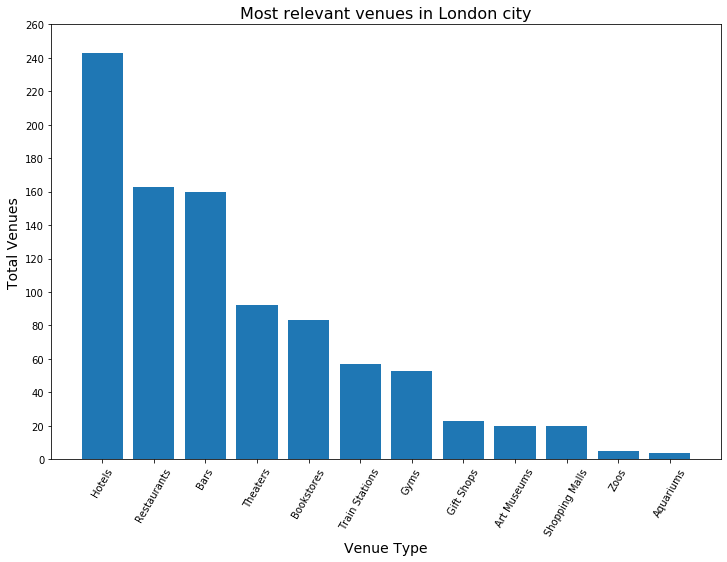

In [27]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_london_num_venues' DataFrame
plt.figure(figsize=(12, 8))

df3 = df_london_num_venues.sort_values('Total Venues', ascending=False)
plt.bar(df3['Venue Type'], df3['Total Venues'])

# title
plt.title('Most relevant venues in London city', fontsize=16)

# labels
plt.xlabel('Venue Type', fontsize=14)
plt.ylabel('Total Venues', fontsize=14)

# rotating x label
plt.xticks(rotation=60)

# increasing the default intervals for y-axis
plt.yticks(np.arange(0, 270, 20))

# displaying the bar plot
plt.show()

As can be noted from the bar plot above, from the venues selected, hotels are the most common venue in London city, followed by restaurants. Now hotels will be grouped by district to find which districts have most hotels in London city.

In [28]:
# grouping london_onehot DataFrame by district and getting the Hotel column with the total of hotels by district
df_london_hotels = london_onehot.groupby('District', axis=0)['Hotel'].sum().reset_index()

# printing the first 10 results
print(df_london_hotels.head(10))

                      District  Hotel
0                   Abbey Wood      0
1                        Acton      5
2        Archway, Tufnell Park      0
3                       Balham      0
4            Barnes, Castelnau      0
5  Battersea, Clapham Junction      1
6        Bayswater, Paddington      6
7    Bethnal Green, Shoreditch      2
8   Blackheath, Westcombe Park      1
9        Bloomsbury, Grays Inn      4


Let's build the bar plot containing the 10 districts with the largest number of hotels.

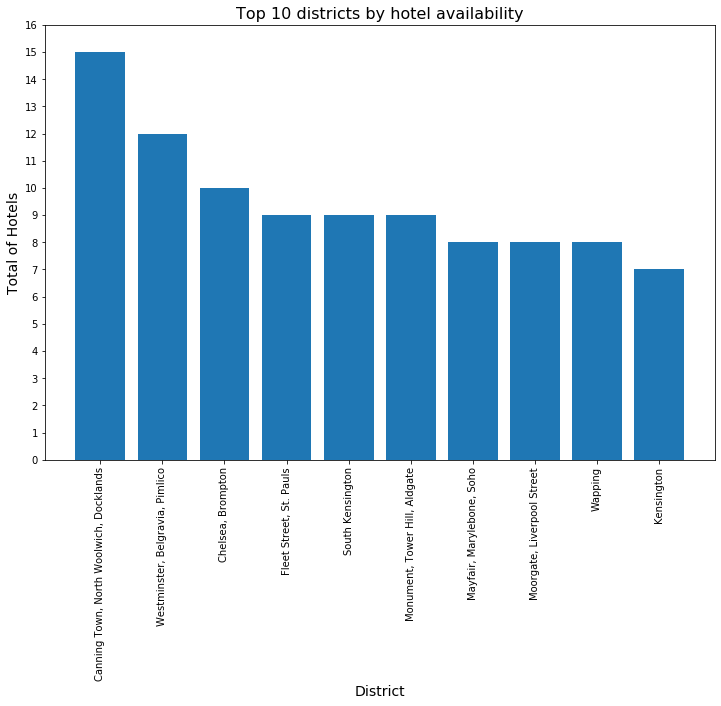

In [29]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_london_hotels' DataFrame
plt.figure(figsize=(12, 8))

df4 = df_london_hotels.sort_values('Hotel', ascending=False).head(10)
plt.bar(df4['District'], df4['Hotel'])

# title
plt.title('Top 10 districts by hotel availability', fontsize=16)

# labels
plt.xlabel('District', fontsize=14)
plt.ylabel('Total of Hotels', fontsize=14)

# rotating x label
plt.xticks(rotation=90)

# increasing the default intervals for y-axis
plt.yticks(np.arange(0, 17, 1))

# displaying the bar plot
plt.show()

As previously mentioned, restaurants is the next category from the venues selected. The next analysis consists in grouping restaurants by district to find which districts have most restaurants in London city. National and international restaurants will be counted to get an idea about the variety of cuisines available in London city restaurants.

In [30]:
# getting the number of African Restaurants in London City
print('The number of African Restaurants in London city is:', (london_onehot['African Restaurant'].values==1).sum())

# getting the number of American Restaurants in London City
print('The number of American Restaurants in London city is:', (london_onehot['American Restaurant'].values==1).sum())

# getting the number of Asian Restaurants in London City
print('The number of Asian Restaurants in London city is:', (london_onehot['Asian Restaurant'].values==1).sum())

# getting the number of Chinese Restaurants in London City
print('The number of Chinese Restaurants in London city is:', (london_onehot['Chinese Restaurant'].values==1).sum())

# getting the number of English Restaurants in London City
print('The number of English Restaurants in London city is:', (london_onehot['English Restaurant'].values==1).sum())

# getting the number of Indian Restaurants in London City
print('The number of Indian Restaurants in London city is:', (london_onehot['Indian Restaurant'].values==1).sum())

# getting the number of Italianh Restaurants in London City
print('The number of Italian Restaurants in London city is:', (london_onehot['Italian Restaurant'].values==1).sum())

# getting the number of Japanese Restaurants in London City
print('The number of Japanese Restaurants in London city is:', (london_onehot['Japanese Restaurant'].values==1).sum())

# getting the number of Spanish Restaurants in London City
print('The number of Spanish Restaurants in London city is:', (london_onehot['Spanish Restaurant'].values==1).sum())

# getting the number of Turkish Restaurants in London City
print('The number of Turkish Restaurants in London city is:', (london_onehot['Turkish Restaurant'].values==1).sum())

The number of African Restaurants in London city is: 22
The number of American Restaurants in London city is: 14
The number of Asian Restaurants in London city is: 49
The number of Chinese Restaurants in London city is: 33
The number of English Restaurants in London city is: 42
The number of Indian Restaurants in London city is: 170
The number of Italian Restaurants in London city is: 271
The number of Japanese Restaurants in London city is: 88
The number of Spanish Restaurants in London city is: 18
The number of Turkish Restaurants in London city is: 143


A new DataFrame based on this information retrieved from london_onehot DataFrame will be created containing the number of restaurants by origin or cuisine type in London city with the purpose of visualizing these restaurants in a bar plot.

In [31]:
# creating a new DataFrame containing the different restaurants by cuisine type in London city
data2 ={'Restaurant Type': ['African', 'American', 'Asian', 'Chinese', 'English', 'Indian', 'Italian', 'Japanese',
                          'Spanish', 'Turkish'],
      'Total of Restaurants': [23, 14, 44, 31, 44, 167, 280, 86, 18, 142]}

df_london_restaurant_types = pd.DataFrame(data2, columns = ['Restaurant Type', 'Total of Restaurants'])

print(df_london_restaurant_types)

  Restaurant Type  Total of Restaurants
0         African                    23
1        American                    14
2           Asian                    44
3         Chinese                    31
4         English                    44
5          Indian                   167
6         Italian                   280
7        Japanese                    86
8         Spanish                    18
9         Turkish                   142


Let's build the bar plot with the total of different types of restaurants in London city.

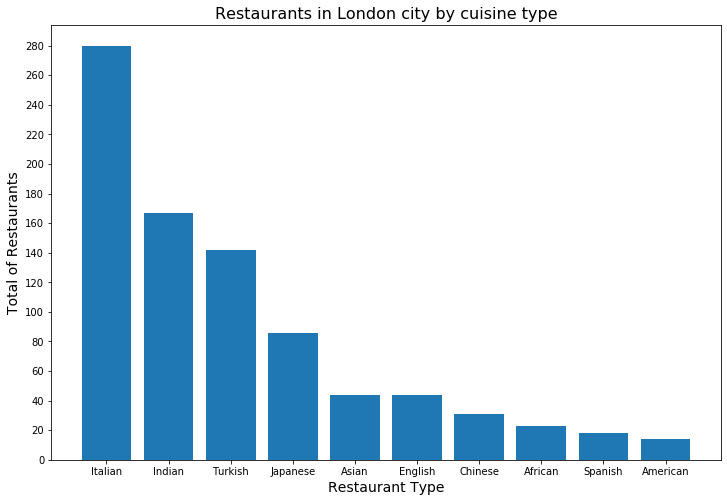

In [32]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_london_restaurant_types' DataFrame
plt.figure(figsize=(12, 8))

df6 = df_london_restaurant_types.sort_values('Total of Restaurants', ascending=False)
plt.bar(df6['Restaurant Type'], df6['Total of Restaurants'])

# title
plt.title('Restaurants in London city by cuisine type', fontsize=16)

# labels
plt.xlabel('Restaurant Type', fontsize=14)
plt.ylabel('Total of Restaurants', fontsize=14)

# increasing the default intervals for y-axis
plt.yticks(np.arange(0, 300, 20))

# displaying the bar plot
plt.show()

As observed above, Italian and Indian restaurants lead the cuisines in London city. A more detailed analysis will reveal the spatial distribution of such restaurants by district.

In [33]:
# grouping london_onehot DataFrame by district and getting the Italian Restaurants column with the number of these restaurants by district
df_london_italian_restaurants = london_onehot.groupby('District', axis=0)['Italian Restaurant'].sum().reset_index()

# printing the first 10 results
print(df_london_italian_restaurants.head(10))

                      District  Italian Restaurant
0                   Abbey Wood                   0
1                        Acton                   2
2        Archway, Tufnell Park                   5
3                       Balham                   5
4            Barnes, Castelnau                   3
5  Battersea, Clapham Junction                   5
6        Bayswater, Paddington                   2
7    Bethnal Green, Shoreditch                   3
8   Blackheath, Westcombe Park                   3
9        Bloomsbury, Grays Inn                   0


Let's build the bar plot containing the 10 districts with the largest number of italian restaurants.

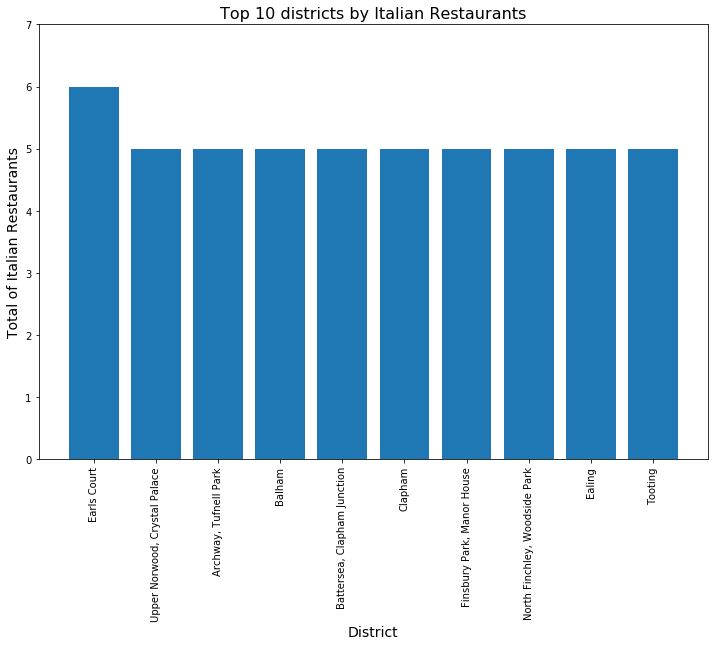

In [34]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_london_italian_restaurants' DataFrame
plt.figure(figsize=(12, 8))

df7 = df_london_italian_restaurants.sort_values('Italian Restaurant', ascending=False).head(10)
plt.bar(df7['District'], df7['Italian Restaurant'])

# title
plt.title('Top 10 districts by Italian Restaurants', fontsize=16)

# labels
plt.xlabel('District', fontsize=14)
plt.ylabel('Total of Italian Restaurants', fontsize=14)

# rotating x label
plt.xticks(rotation=90)

# increasing the default intervals for y-axis
plt.yticks(np.arange(0, 8, 1))

# displaying the bar plot
plt.show()

In [35]:
# grouping london_onehot DataFrame by district and getting the Indian Restaurants column with the number of these restaurants by district
df_london_indian_restaurants = london_onehot.groupby('District', axis=0)['Indian Restaurant'].sum().reset_index()

# printing the first 10 results
print(df_london_indian_restaurants.head(10))

                      District  Indian Restaurant
0                   Abbey Wood                  0
1                        Acton                  1
2        Archway, Tufnell Park                  2
3                       Balham                  1
4            Barnes, Castelnau                  1
5  Battersea, Clapham Junction                  1
6        Bayswater, Paddington                  1
7    Bethnal Green, Shoreditch                  2
8   Blackheath, Westcombe Park                  1
9        Bloomsbury, Grays Inn                  1


Let's build the bar plot containing the 10 districts with the largest number of indian restaurants.

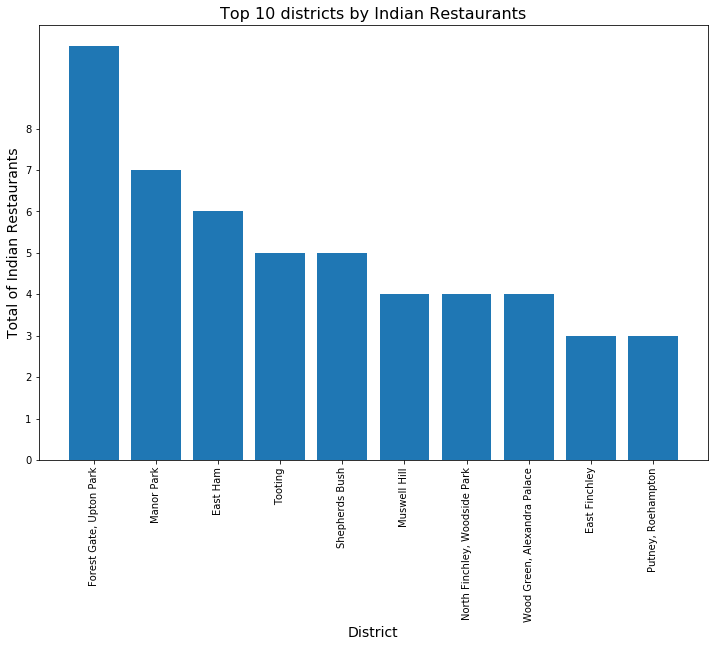

In [36]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_london_indian_restaurants' DataFrame
plt.figure(figsize=(12, 8))

df8 = df_london_indian_restaurants.sort_values('Indian Restaurant', ascending=False).head(10)
plt.bar(df8['District'], df8['Indian Restaurant'])

# title
plt.title('Top 10 districts by Indian Restaurants', fontsize=16)

# labels
plt.xlabel('District', fontsize=14)
plt.ylabel('Total of Indian Restaurants', fontsize=14)

# rotating x label
plt.xticks(rotation=90)

# increasing the default intervals for y-axis
plt.yticks(np.arange(0, 9, 1))

# displaying the bar plot
plt.show()

The next step consists in grouping rows by district and taking the mean of the frequency of occurrence of each category.

In [37]:
# grouping rows by district
london_grouped = london_onehot.groupby('District').mean().reset_index()
london_grouped.head()

District  Accessories Store  Afghan Restaurant  \
0             Abbey Wood                0.0                0.0   
1                  Acton                0.0                0.0   
2  Archway, Tufnell Park                0.0                0.0   
3                 Balham                0.0                0.0   
4      Barnes, Castelnau                0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                 0.0                 0.00           0.0       0.0     0.0   
1                 0.0                 0.00           0.0       0.0     0.0   
2                 0.0                 0.00           0.0       0.0     0.0   
3                 0.0                 0.00           0.0       0.0     0.0   
4                 0.0                 0.01           0.0       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0         0.00        0.00   
1               0.0                     0.0         0.01        0.00   
2               0.0                     0.0         0.00        0.00   
3               0.0                     0.0         0.00        0.00   
4               0.0                     0.0         0.00        0.01   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                  0.0              0.00                 0.0   
1                  0.0              0.00                 0.0   
2                  0.0              0.01                 0.0   
3                  0.0              0.01                 0.0   
4                  0.0              0.00                 0.0   

   Australian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                    0.0            0.0        0.0         0.0         0.0   
1                    0.0            0.0        0.0         0.0         0.0   
2                    0.0            0.0        0.0         0.0         0.0   
3                    0.0            0.0        0.0         0.0         0.0   
4                    0.0            0.0        0.0         0.0         0.0   

   Bakery   Bar  Baseball Field  Beach  Bed & Breakfast  Beer Bar  \
0    0.00  0.00             0.0    0.0              0.0      0.00   
1    0.03  0.00             0.0    0.0              0.0      0.00   
2    0.05  0.01             0.0    0.0              0.0      0.00   
3    0.05  0.03             0.0    0.0              0.0      0.01   
4    0.01  0.01             0.0    0.0              0.0      0.00   

   Beer Garden  Beer Store  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0          0.0        0.00        0.0    0.00            0.0        0.0   
1          0.0        0.00        0.0    0.00            0.0        0.0   
2          0.0        0.01        0.0    0.00            0.0        0.0   
3          0.0        0.01        0.0    0.01            0.0        0.0   
4          0.0        0.01        0.0    0.00            0.0        0.0   

   Boutique  Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  \
0       0.0           0.00         0.0        0.0                   0.0   
1       0.0           0.01         0.0        0.0                   0.0   
2       0.0           0.00         0.0        0.0                   0.0   
3       0.0           0.00         0.0        0.0                   0.0   
4       0.0           0.00         0.0        0.0                   0.0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Buddhist Temple  Buffet  \
0            0.00     0.00     0.0              0.0              0.0     0.0   
1            0.02     0.01     0.0              0.0              0.0     0.0   
2            0.00     0.00     0.0              0.0              0.0     0.0   
3            0.02     0.01     0.0              0.0              0.0     0.0   
4            0.00     0.01     0.0              0.0              0.0     0.0   

   Burger Joint  Burrito Place  Bus Station  Bus Stop  Butcher  C

Let's confirm the new size.

In [38]:
# size of the london_grouped DataFrame
london_grouped.shape

(121, 348)

In [39]:
# grouping the 10 common venues in each district
num_top_venues = 10 # Top common venues needed
for district in london_grouped['District']:
    print("---"+district+"---")
    temp = london_grouped[london_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

---Abbey Wood---
                    venue  freq
0             Supermarket  0.16
1           Grocery Store  0.11
2    Fast Food Restaurant  0.11
3                    Lake  0.05
4                Platform  0.05
5  Furniture / Home Store  0.05
6    Gym / Fitness Center  0.05
7          Hardware Store  0.05
8          Clothing Store  0.05
9           Historic Site  0.05


---Acton---
                       venue  freq
0                Coffee Shop  0.08
1              Grocery Store  0.07
2       Gym / Fitness Center  0.06
3                        Pub  0.06
4                      Hotel  0.05
5                       Park  0.04
6  Middle Eastern Restaurant  0.04
7                 Hookah Bar  0.03
8                     Bakery  0.03
9                  Gastropub  0.03


---Archway, Tufnell Park---
                 venue  freq
0                  Pub  0.19
1          Coffee Shop  0.07
2                 Café  0.06
3   Italian Restaurant  0.05
4               Bakery  0.05
5          Pizza Place  0.05

                  venue  freq
0    Italian Restaurant  0.06
1                 Hotel  0.05
2  Gym / Fitness Center  0.04
3           Coffee Shop  0.04
4                Bakery  0.04
5                  Café  0.04
6               Exhibit  0.03
7           Pizza Place  0.03
8     French Restaurant  0.03
9        Science Museum  0.03


---East Dulwich---
                  venue  freq
0                  Café  0.10
1                  Park  0.08
2           Pizza Place  0.07
3                   Pub  0.07
4           Coffee Shop  0.05
5    Italian Restaurant  0.05
6              Platform  0.03
7                Forest  0.03
8  Gym / Fitness Center  0.03
9         Grocery Store  0.03


---East Finchley---
                  venue  freq
0                  Café  0.14
1                   Pub  0.11
2  Gym / Fitness Center  0.05
3           Coffee Shop  0.04
4    Italian Restaurant  0.04
5                Forest  0.04
6                Bakery  0.03
7     Indian Restaurant  0.03
8   Japanese Restaurant  0.

                  venue  freq
0                   Pub  0.13
1                  Café  0.08
2                  Park  0.07
3             Gastropub  0.05
4                Garden  0.04
5            Food Truck  0.03
6            Restaurant  0.03
7  Gym / Fitness Center  0.03
8           Supermarket  0.03
9           Coffee Shop  0.03


---Leyton---
                      venue  freq
0                       Pub  0.12
1                      Café  0.09
2               Coffee Shop  0.04
3                Restaurant  0.04
4                      Park  0.04
5            Clothing Store  0.02
6                 Juice Bar  0.02
7  Mediterranean Restaurant  0.02
8         Fish & Chips Shop  0.02
9                  Beer Bar  0.02


---Leytonstone---
                      venue  freq
0                       Pub  0.16
1                      Café  0.11
2             Grocery Store  0.08
3                      Park  0.08
4               Coffee Shop  0.05
5  Mediterranean Restaurant  0.05
6               Pizza P

                venue  freq
0                 Pub  0.12
1                Café  0.12
2        Cocktail Bar  0.04
3      Breakfast Spot  0.04
4  Turkish Restaurant  0.04
5                Park  0.04
6         Coffee Shop  0.04
7         Pizza Place  0.03
8              Bakery  0.03
9     Organic Grocery  0.02


---Stratford, West Ham---
               venue  freq
0                Pub  0.11
1               Café  0.07
2      Grocery Store  0.05
3               Park  0.05
4        Art Gallery  0.04
5        Coffee Shop  0.04
6              Hotel  0.02
7         Restaurant  0.02
8  Fish & Chips Shop  0.02
9            Brewery  0.02


---Streatham, Norbury---
            venue  freq
0             Pub  0.12
1   Grocery Store  0.11
2            Café  0.09
3     Supermarket  0.06
4     Coffee Shop  0.04
5            Park  0.04
6     Pizza Place  0.03
7        Pharmacy  0.03
8  Breakfast Spot  0.03
9             Bar  0.02


---Sydenham---
                  venue  freq
0                   Pub  0.14

The next step will consist in printing each district with the top 10 most common venues and creating a function to sort the venues in descending order.

In [40]:
# This function sort the london venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new DataFrame and display the top 10 venues for each district.

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new DataFrame
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = london_grouped['District']

for ind in np.arange(london_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)
    
districts_venues_sorted.head()

District 1st Most Common Venue 2nd Most Common Venue  \
0             Abbey Wood           Supermarket         Grocery Store   
1                  Acton           Coffee Shop         Grocery Store   
2  Archway, Tufnell Park                   Pub           Coffee Shop   
3                 Balham                   Pub           Coffee Shop   
4      Barnes, Castelnau                   Pub                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant                  Lake         Train Station   
1                   Pub  Gym / Fitness Center                 Hotel   
2                  Café           Pizza Place                Bakery   
3                  Park     French Restaurant    Italian Restaurant   
4                  Café           Coffee Shop             Gastropub   

       6th Most Common Venue        7th Most Common Venue  \
0                      Trail  Eastern European Restaurant   
1  Middle Eastern Restaurant                         Park   
2         Italian Restaurant                    Gastropub   
3                     Bakery                  Pizza Place   
4             Farmers Market                   Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0              Pharmacy              Platform        Warehouse Store  
1            Hookah Bar                Bakery              Gastropub  
2   Japanese Restaurant                 Trail                   Park  
3                  Café                   Bar           Burger Joint  
4         Grocery Store    Italian Restaurant          Historic Site

Word clouds are commonly used to perform high-level analysis and visualization of text data and will be applied below to find the most common venues in London city using the previous DataFrame districts_venues_sorted, still sorted by district, in a powerful image using WordCloud library.

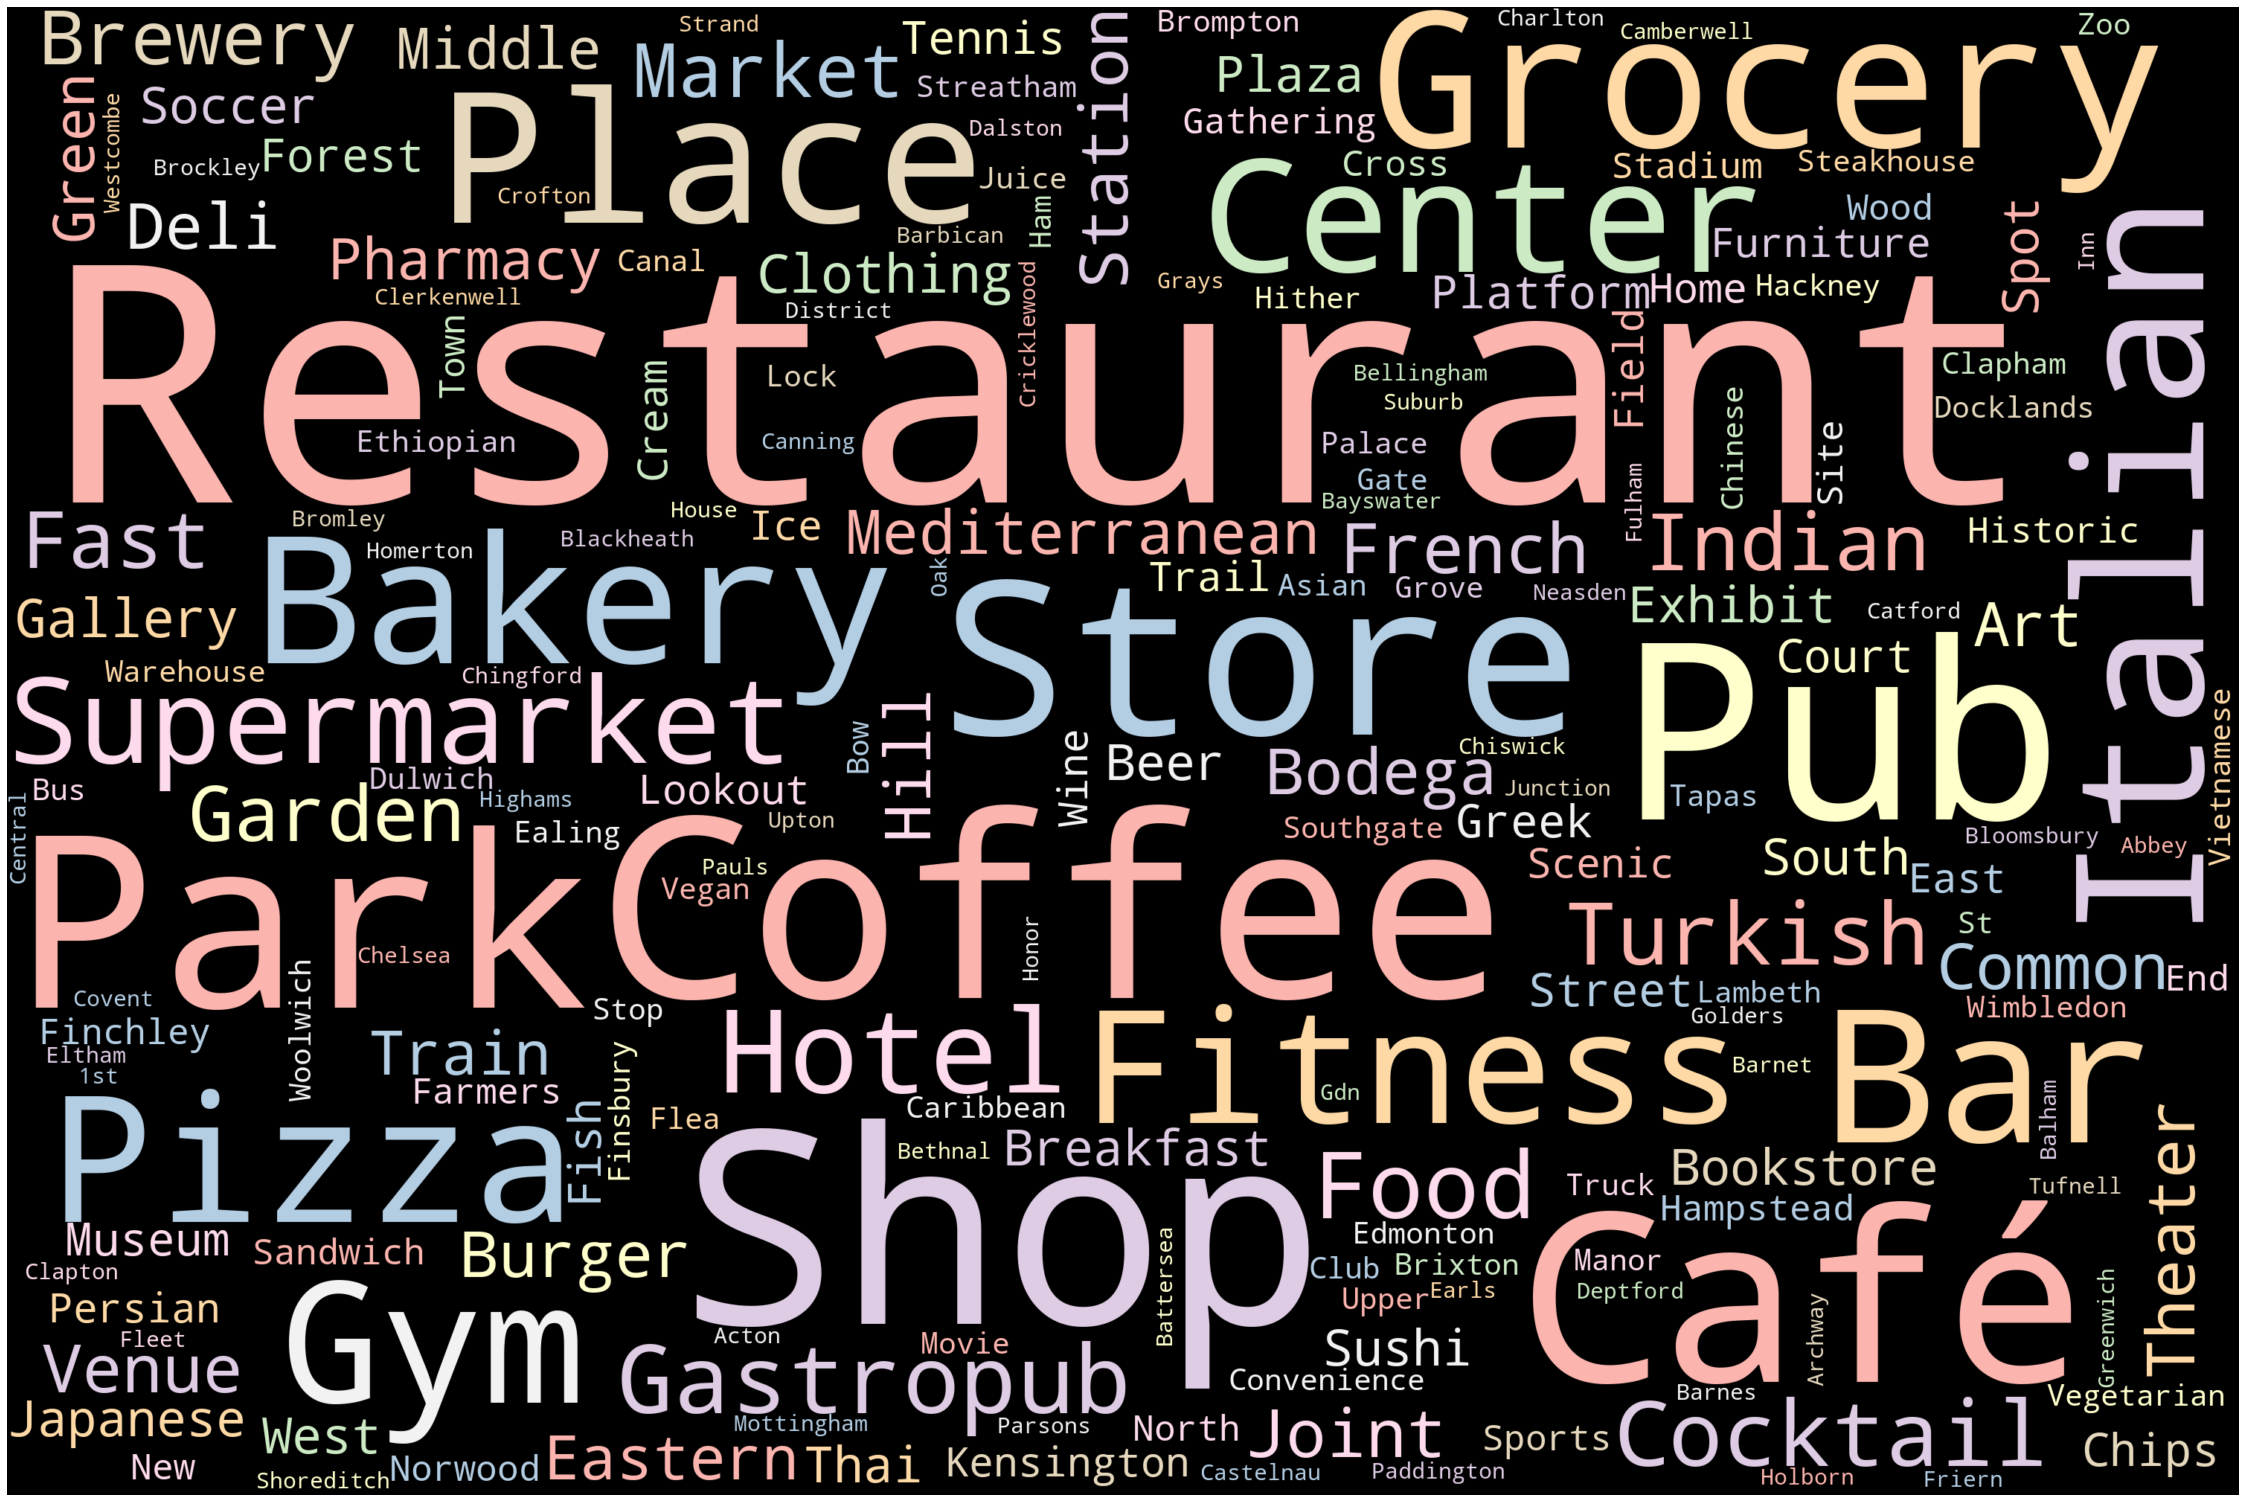

In [42]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
text = districts_venues_sorted

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 5.2. Clustering Districts

The following section consists in running k-means to cluster the district into 5 clusters. The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

In [43]:
# Setting the number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('District', 1)

# Running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# Checking cluster labels generated for each row in the DataFrame
kmeans.labels_[0:10]

array([4, 1, 2, 2, 2, 0, 3, 3, 2, 3])

Let's create a new DataFrame that includes the cluster as well as the top 10 venues for each district.

In [44]:
# Adding clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df_PCLondon

# Merging london_grouped with df to add latitude/longitude for each district
london_merged = london_merged.join(districts_venues_sorted.set_index('District'), on='District')

# Checking the last columns
london_merged.head()

Postal Code                        District   Latitude  Longitude  \
0          E1  Whitechapel, Stepney, Mile End  51.520220  -0.054310   
1         E1W                         Wapping  51.506282  -0.069426   
2          E2       Bethnal Green, Shoreditch  51.526690  -0.062570   
3          E3             Bow, Bromley-by-Bow  51.527020  -0.025940   
4          E4         Chingford, Highams Park  51.617800  -0.009340   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3           Coffee Shop                  Café   
1               3           Coffee Shop                 Hotel   
2               3           Coffee Shop                Bakery   
3               2                   Pub                  Café   
4               2                   Pub           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Restaurant                   Pub          Cocktail Bar   
1                   Pub  Gym / Fitness Center         Deli / Bodega   
2                  Café                   Pub             Bookstore   
3           Coffee Shop                  Park           Art Gallery   
4         Grocery Store                  Park           Supermarket   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Hotel                  Farm    Italian Restaurant   
1     French Restaurant                Garden      Tapas Restaurant   
2            Restaurant           Pizza Place                Market   
3            Canal Lock            Restaurant    Turkish Restaurant   
4   Sporting Goods Shop    Turkish Restaurant                  Café   

  9th Most Common Venue 10th Most Common Venue  
0    Turkish Restaurant            Pizza Place  
1          Cocktail Bar                Brewery  
2    Italian Restaurant            Flea Market  
3                   Bar              Wine Shop  
4  Fast Food Restaurant                    Gym

The resulting clusters will be visualized using Folium library.

In [45]:
# Creating the map with folium library
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

london_merged_nonan = london_merged.dropna(subset=['Cluster Labels'])

# Adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged_nonan['Latitude'], london_merged_nonan['Longitude'], london_merged_nonan['District'], london_merged_nonan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
    
map_clusters

**Remarks**: Click on the markers to see the district and the corresponding cluster. Here below, each cluster is presented with its corresponding color.
* Cluster 0: Red color (London north and south periphery)
* Cluster 1: Purple color (London north outskirts)
* Cluster 2: Light Blue color (London center and south)
* Cluster 3: Light Green color (London center and center-east)
* Cluster 4: Light Orange color (London east outskirts)

### 5.3. Examining the Clusters

Each cluster will be examined and set the discriminating venue categories that distinguish each cluster. Each cluster will be visualized using word cloud with the purpose of looking for the most common venues available in each cluster.

**Cluster 0**

In [46]:
london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 0, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]

District 1st Most Common Venue  \
5                                 Clapton                   Pub   
8                        Hackney, Dalston                   Pub   
19                           Olympic Park                  Café   
27                          East Finchley                  Café   
29             Finsbury Park, Manor House                  Café   
30                               Highbury                   Pub   
32                               Holloway                   Pub   
33                    Hornsey, Crouch End                  Café   
40                          Seven Sisters    Turkish Restaurant   
41         Stoke Newington, Stamford Hill                  Café   
48              Regents Park, Camden Town                  Café   
50               Hampstead, Swiss Cottage                  Café   
53   West Hampstead, Kilburn, Queens Park                   Pub   
55                          St Johns Wood                  Café   
63                             Camberwell           Coffee Shop   
69                                Lambeth                  Café   
75            Walworth, Elephant & Castle           Coffee Shop   
80                           East Dulwich                  Café   
82                             Herne Hill           Coffee Shop   
88                Brixton, Streatham Hill           Coffee Shop   
90                                Clapham                   Pub   
92                  Fulham, Parsons Green                  Café   
94               South Lambeth, Nine Elms                  Café   
95                     Stockwell, Brixton           Coffee Shop   
97            Battersea, Clapham Junction                   Pub   
105                     Wimbledon, Merton                   Pub   
115            Maida Vale, Warwick Avenue                   Pub   
116      Ladbroke Grove, North Kensington                   Pub   
117            Notting Hill, Holland Park                   Pub   
118                        Shepherds Bush                   Pub   
120                       West Kensington                  Café   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5                    Café           Coffee Shop                  Park   
8             Coffee Shop                Bakery                  Café   
19                    Pub                  Park           Art Gallery   
27                    Pub  Gym / Fitness Center    Italian Restaurant   
29                    Pub    Turkish Restaurant    Italian Restaurant   
30                   Café           Coffee Shop                  Park   
32                   Café           Coffee Shop                  Park   
33                    Pub    Turkish Restaurant           Coffee Shop   
40                   Café                   Pub                  Park   
41                    Pub    Turkish Restaurant        Breakfast Spot   
48            Coffee Shop     French Restaurant                   Bar   
50                    Pub                  Park                Bakery   
53                   Café                Bakery           Pizza Place   
55            Zoo Exhibit           Coffee Shop                   Pub   
63                   Café                   Pub                  Park   
69                    Pub           Coffee Shop                  Park   
75                    Pub                  Café                  Park   
80                   Park                   Pub           Pizza Place   
82                    Pub                  Café          Cocktail Bar   
88                    Pub                Market               Brewery   
90            Coffee Shop    Italian Restaurant            Restaurant   
92            Coffee Shop                  Park           Pizza Place   
94            Coffee Shop                   Pub                  Park   
95                   Café                   Pub          Cocktail Bar   
97            Coffee Shop                  Café    Italian Rest

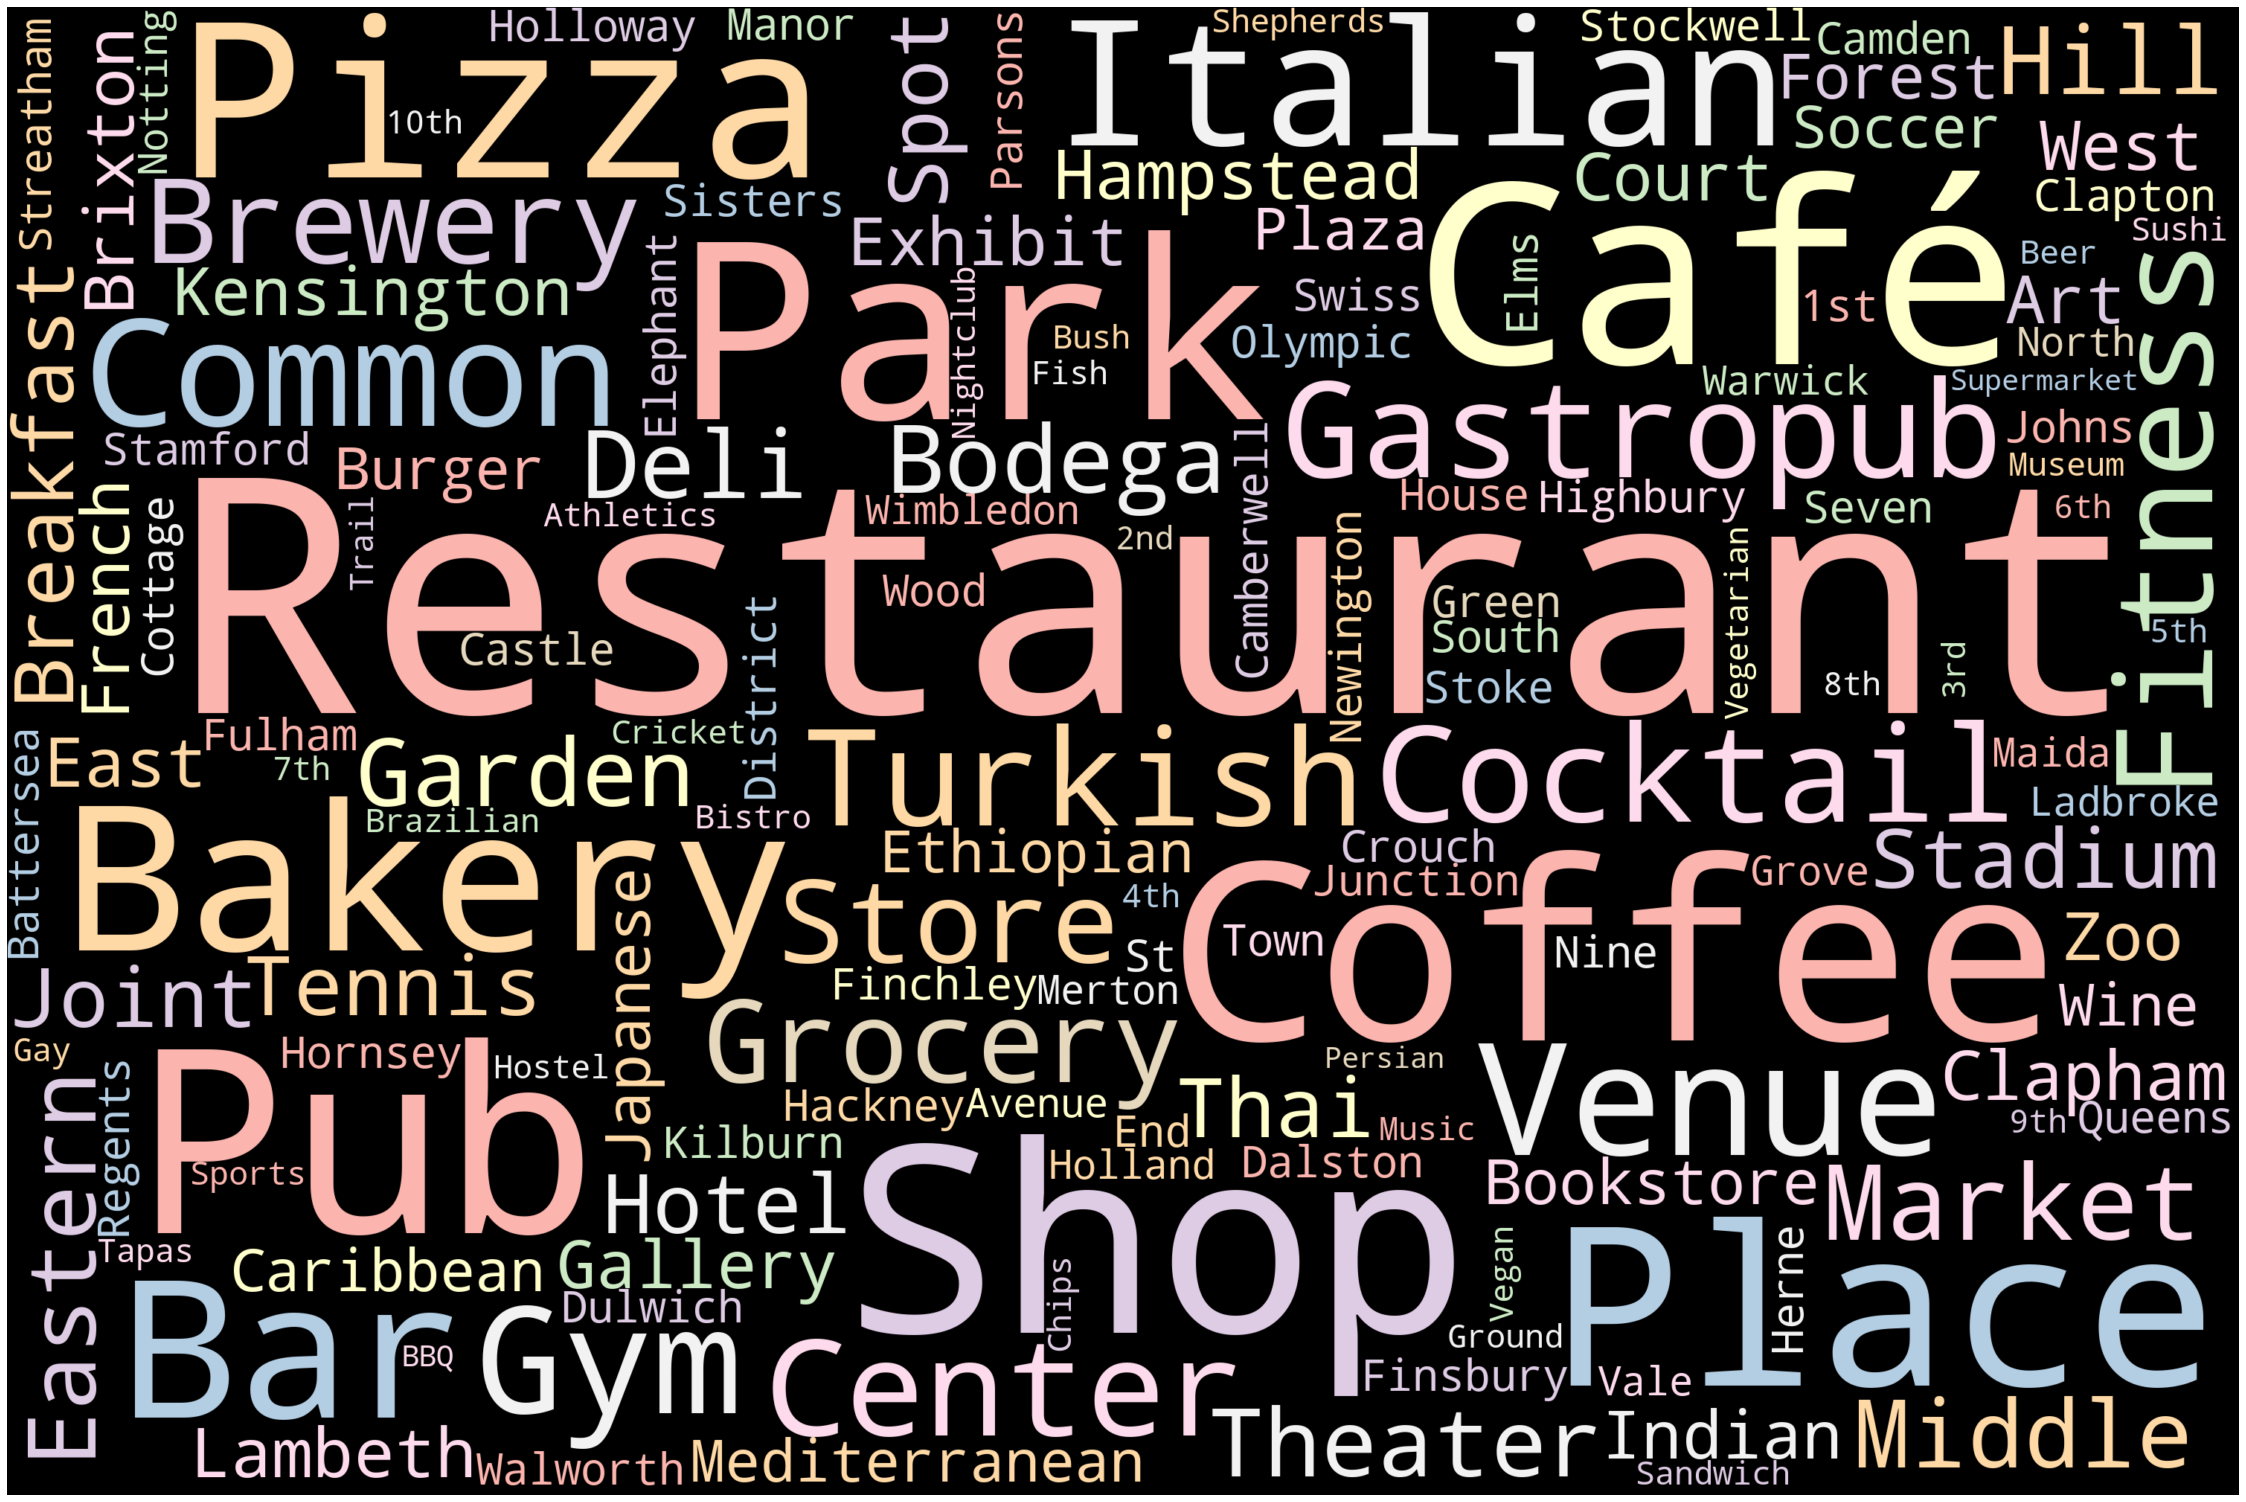

In [47]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster1 = london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 0, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]
text = df_cluster1

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 1**

In [48]:
london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 1, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]

District 1st Most Common Venue  \
6                               East Ham         Grocery Store   
7                Forest Gate, Upton Park         Grocery Store   
12                            Manor Park         Grocery Store   
13                              Plaistow         Grocery Store   
18                        South Woodford         Grocery Store   
28                      Finchley Central                Bakery   
34                        Lower Edmonton    Turkish Restaurant   
36          Friern Barnet, New Southgate         Grocery Store   
37         North Finchley, Woodside Park           Coffee Shop   
38                         Palmers Green                   Pub   
39                             Southgate         Grocery Store   
45                 Whetstone, Totteridge           Coffee Shop   
46                        Winchmore Hill                  Park   
47          Wood Green, Alexandra Palace                   Pub   
49                  Cricklewood, Neasden           Coffee Shop   
51                   Hendon, Brent Cross         Grocery Store   
54                             Mill Hill    Italian Restaurant   
56                   Kinsbury, Colindale           Supermarket   
57    Willesden, Harlesden, Kensal Green                  Café   
58   Golders Green, Hampstead Gdn Suburb         Grocery Store   
64     Catford, Hither Green, Bellingham         Grocery Store   
67                    Eltham, Mottingham         Grocery Store   
70                       Lee, Grove Park         Grocery Store   
76                   Woolwich, Plumstead         Grocery Store   
83                         South Norwood         Grocery Store   
102                   Streatham, Norbury                   Pub   
109                                Acton           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6             Supermarket     Indian Restaurant           Coffee Shop   
7                     Pub     Indian Restaurant  Fast Food Restaurant   
12      Indian Restaurant  Fast Food Restaurant        Clothing Store   
13                    Pub  Fast Food Restaurant              Platform   
18                    Pub           Coffee Shop                  Café   
28          Grocery Store           Supermarket  Gym / Fitness Center   
34          Grocery Store           Coffee Shop  Fast Food Restaurant   
36                    Pub                  Café           Coffee Shop   
37                   Café           Supermarket    Italian Restaurant   
38          Grocery Store           Coffee Shop      Greek Restaurant   
39                    Pub                  Café                  Park   
45                    Pub         Grocery Store                  Café   
46                    Pub           Supermarket         Grocery Store   
47                   Café         Grocery Store                  Park   
49                   Café         Grocery Store                  Park   
51            Coffee Shop           Supermarket                  Café   
54          Grocery Store                   Pub           Golf Course   
56            Coffee Shop         Grocery Store                  Café   
57            Coffee Shop           Pizza Place         Grocery Store   
58            Coffee Shop                  Café                  Park   
64            Supermarket                  Park                  Café   
67   Fast Food Restaurant                  Park           Pizza Place   
70                   Park                   Pub                  Café   
76                    Pub           Supermarket                  Park   
83                    Pub           Supermarket              Platform   
102         Grocery Store                  Café           Supermarket   
109         Grocery Store                   Pub  Gym / Fitness Center   

         5th Most Common Venue      6th Most Common Venue  \
6         Fast Food Restaurant                      Hotel   
7               

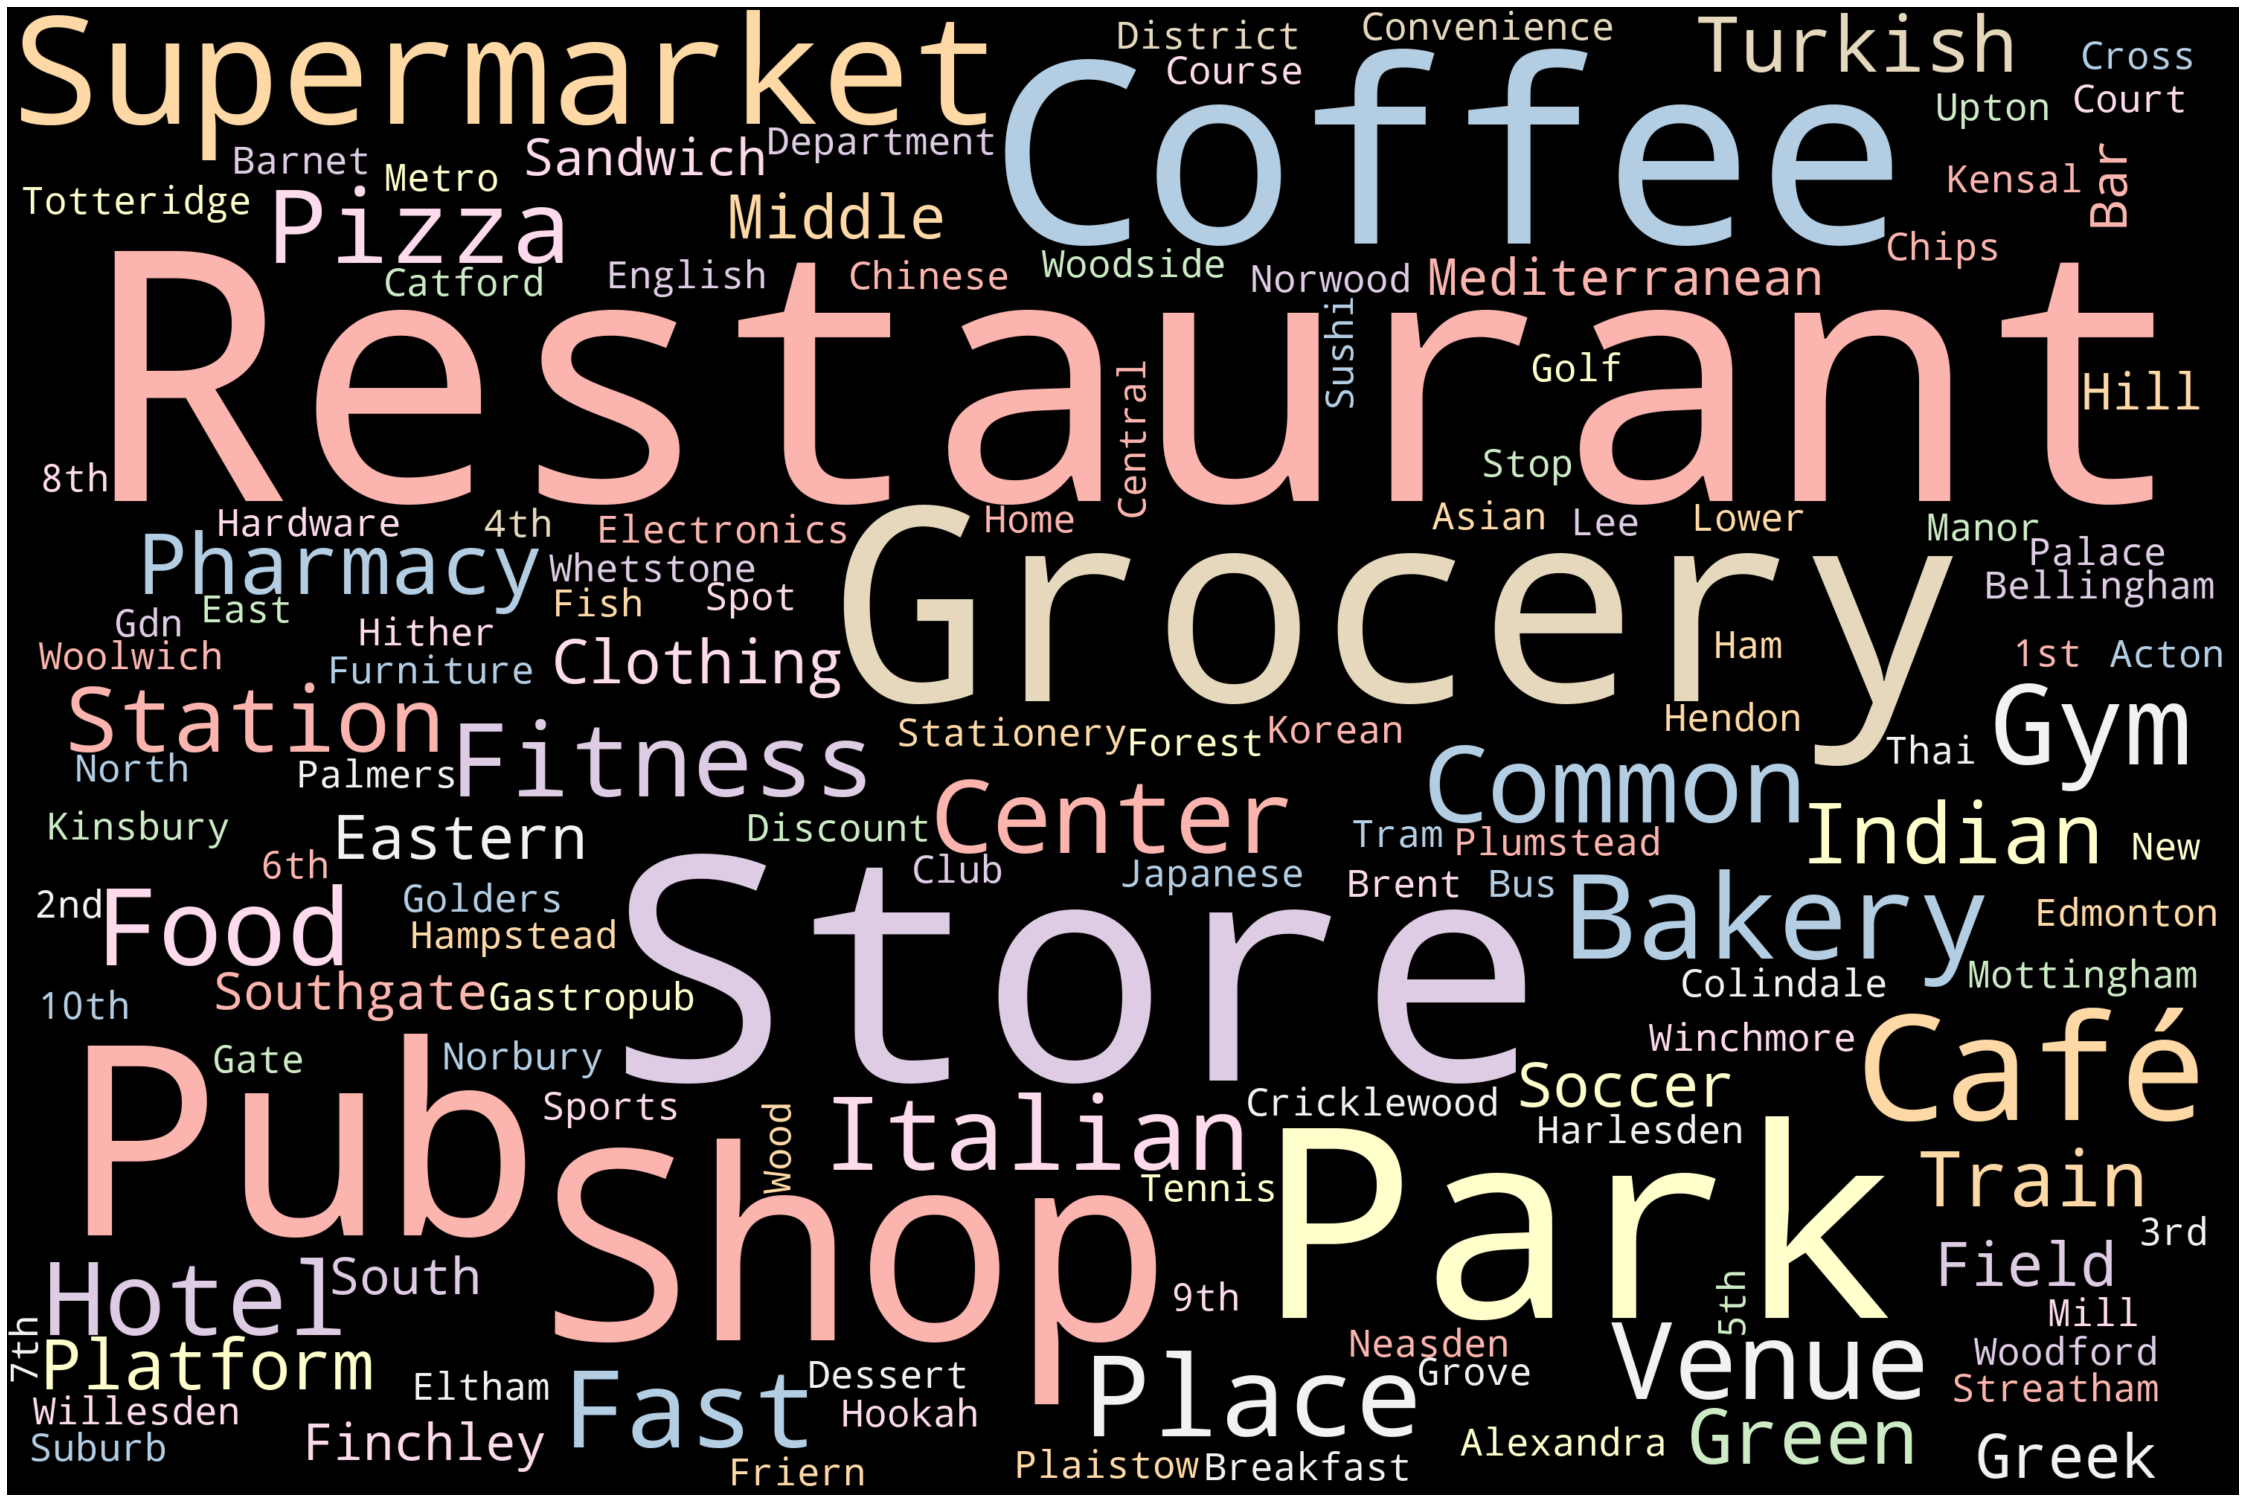

In [49]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster2 = london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 1, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]
text = df_cluster2

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 2**

In [50]:
london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 2, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]

District 1st Most Common Venue  \
3                           Bow, Bromley-by-Bow                   Pub   
4                       Chingford, Highams Park                   Pub   
9                             Hackney, Homerton                   Pub   
10                                       Leyton                   Pub   
11                                  Leytonstone                   Pub   
15                          Stratford, West Ham                   Pub   
17                                  Walthamstow                   Pub   
31                                     Highgate                   Pub   
35                                 Muswell Hill                   Pub   
42                                    Tottenham                   Pub   
43                               Upper Edmonton                   Pub   
44                        Archway, Tufnell Park                   Pub   
52                                 Kentish Town                   Pub   
61                   Blackheath, Westcombe Park                   Pub   
62       Brockley, Crofton Park, Honor Oak Park                   Pub   
65                                     Charlton                   Pub   
66                                     Deptford                   Pub   
68                                    Greenwich                   Pub   
71                       Lewisham, Hither Green                   Pub   
72                    New Cross, New Cross Gate                   Pub   
73                             Peckham, Nunhead                   Pub   
74   Rotherhithe, South Bermonsey, Surrey Docks                   Pub   
77                Upper Norwood, Crystal Palace                   Pub   
78                               Penge, Anerley                   Pub   
79                                      Dulwich                   Pub   
81                                  Forest Hill                   Pub   
84                                     Sydenham                   Pub   
85                     West Norwood, Tulse Hill                   Pub   
98                                       Balham                   Pub   
99                            Barnes, Castelnau                   Pub   
100                        Mortlake, East Sheen                   Pub   
101                          Putney, Roehampton                   Pub   
103                                     Tooting                   Pub   
104                      Wandsworth, Earlsfield                   Pub   
106                South Wimbledon, Raynes Park                   Pub   
110                                    Chiswick           Coffee Shop   
111                                      Ealing           Coffee Shop   
112                                 Hammersmith                   Pub   
113                                     Hanwell                   Pub   
119                                 West Ealing                   Pub   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3                    Café           Coffee Shop                  Park   
4             Coffee Shop         Grocery Store                  Park   
9             Coffee Shop                  Café                Bakery   
10                   Café                  Park            Restaurant   
11                   Café                  Park         Grocery Store   
15                   Café                  Park         Grocery Store   
17          Grocery Store           Coffee Shop           Supermarket   
31                   Café           Coffee Shop    Italian Restaurant   
35                   Café           Coffee Shop   Japanese Restaurant   
42            Coffee Shop                  Park  Fast Food Restaurant   
43            Coffee Shop           Supermarket    Turkish Restaurant   
44            Coffee Shop                  Café           Pizza Place   
52            Coffee Shop                  Café             Gastropub   
61                   Pa

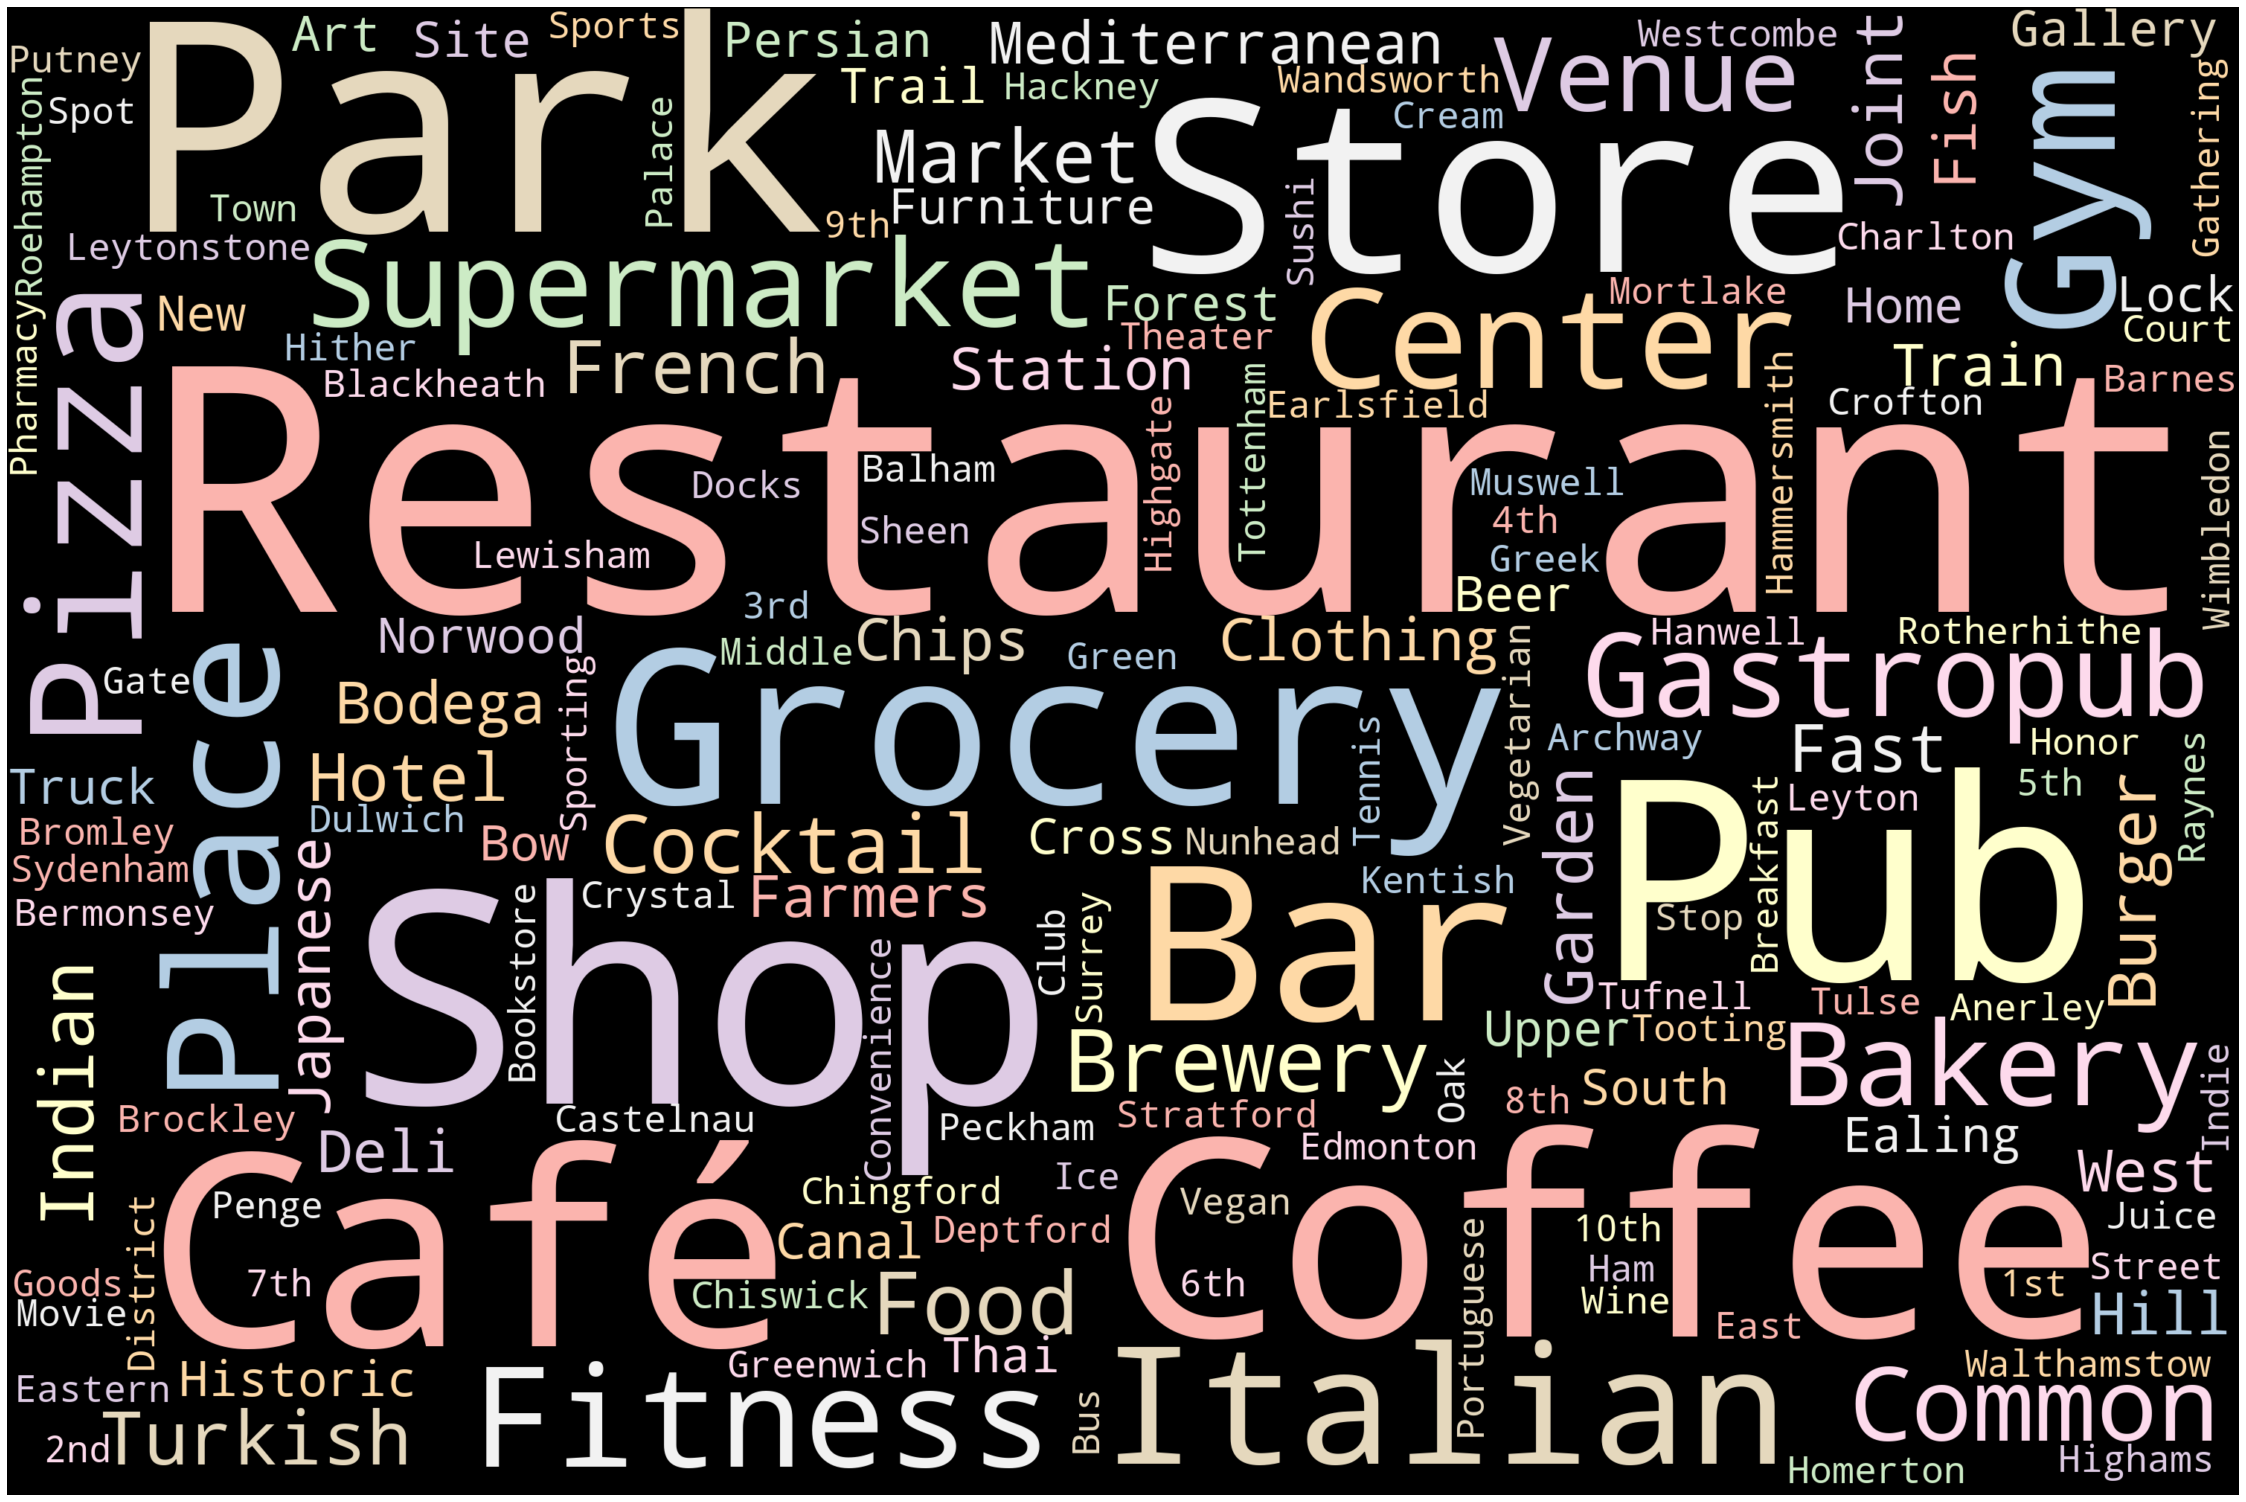

In [51]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster3 = london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 2, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]
text = df_cluster3

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 3**

In [52]:
london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 3, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]

District 1st Most Common Venue  \
0               Whitechapel, Stepney, Mile End           Coffee Shop   
1                                      Wapping           Coffee Shop   
2                    Bethnal Green, Shoreditch           Coffee Shop   
14   Poplar, Millwall, Isle of Dogs, Docklands           Coffee Shop   
16     Canning Town, North Woolwich, Docklands                 Hotel   
20                       Bloomsbury, Grays Inn           Coffee Shop   
21              Covent Garden, Holborn, Strand                 Hotel   
22             Clerkenwell, Finsbury, Barbican           Coffee Shop   
23                  Moorgate, Liverpool Street           Coffee Shop   
24               Monument, Tower Hill, Aldgate           Coffee Shop   
25                     Fleet Street, St. Pauls                 Hotel   
26             Islington, Barnsbury, Canonbury           Coffee Shop   
59    Waterloo, Bermondsey, Southwark, Borough           Coffee Shop   
87             Westminster, Belgravia, Pimlico                 Hotel   
89                           Chelsea, Brompton                 Hotel   
91                                 Earls Court    Italian Restaurant   
93                            South Kensington                 Hotel   
96                   West Brompton, Worlds End                Bakery   
107                  Mayfair, Marylebone, Soho                 Hotel   
108                      Bayswater, Paddington                   Pub   
114                                 Kensington                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                    Café            Restaurant                   Pub   
1                   Hotel                   Pub  Gym / Fitness Center   
2                  Bakery                  Café                   Pub   
14                    Pub                 Hotel                  Park   
16            Coffee Shop                   Pub         Grocery Store   
20                 Bakery                 Hotel               Theater   
21                Theater           Coffee Shop                 Plaza   
22                  Hotel          Cocktail Bar  Gym / Fitness Center   
23                  Hotel  Gym / Fitness Center          Cocktail Bar   
24                  Hotel  Gym / Fitness Center    Italian Restaurant   
25                Theater           Coffee Shop  Gym / Fitness Center   
26                    Pub                Bakery                  Café   
59                  Hotel                   Pub               Theater   
87                  Plaza                  Café                  Park   
89                   Café                 Plaza         Deli / Bodega   
91                  Hotel           Coffee Shop                Bakery   
93                   Café        Ice Cream Shop    Italian Restaurant   
96                  Hotel           Coffee Shop        Ice Cream Shop   
107             Juice Bar     French Restaurant           Coffee Shop   
108                 Hotel                  Café            Restaurant   
114                Garden                  Café               Exhibit   

    5th Most Common Venue 6th Most Common Venue     7th Most Common Venue  \
0            Cocktail Bar                 Hotel                      Farm   
1           Deli / Bodega     French Restaurant                    Garden   
2               Bookstore            Restaurant               Pizza Place   
14                    Bar    Italian Restaurant                     Plaza   
16                   Park    Chinese Restaurant                    Lounge   
20             Steakhouse              Beer Bar               Pizza Place   
21              Bookstore                Bakery                Steakhouse   
22                    Pub                   Bar                      Café   
23             Restaurant    Italian Restaurant     Vietnamese Restaurant   
24          Grocery Store               Theater            Scenic Lookout   

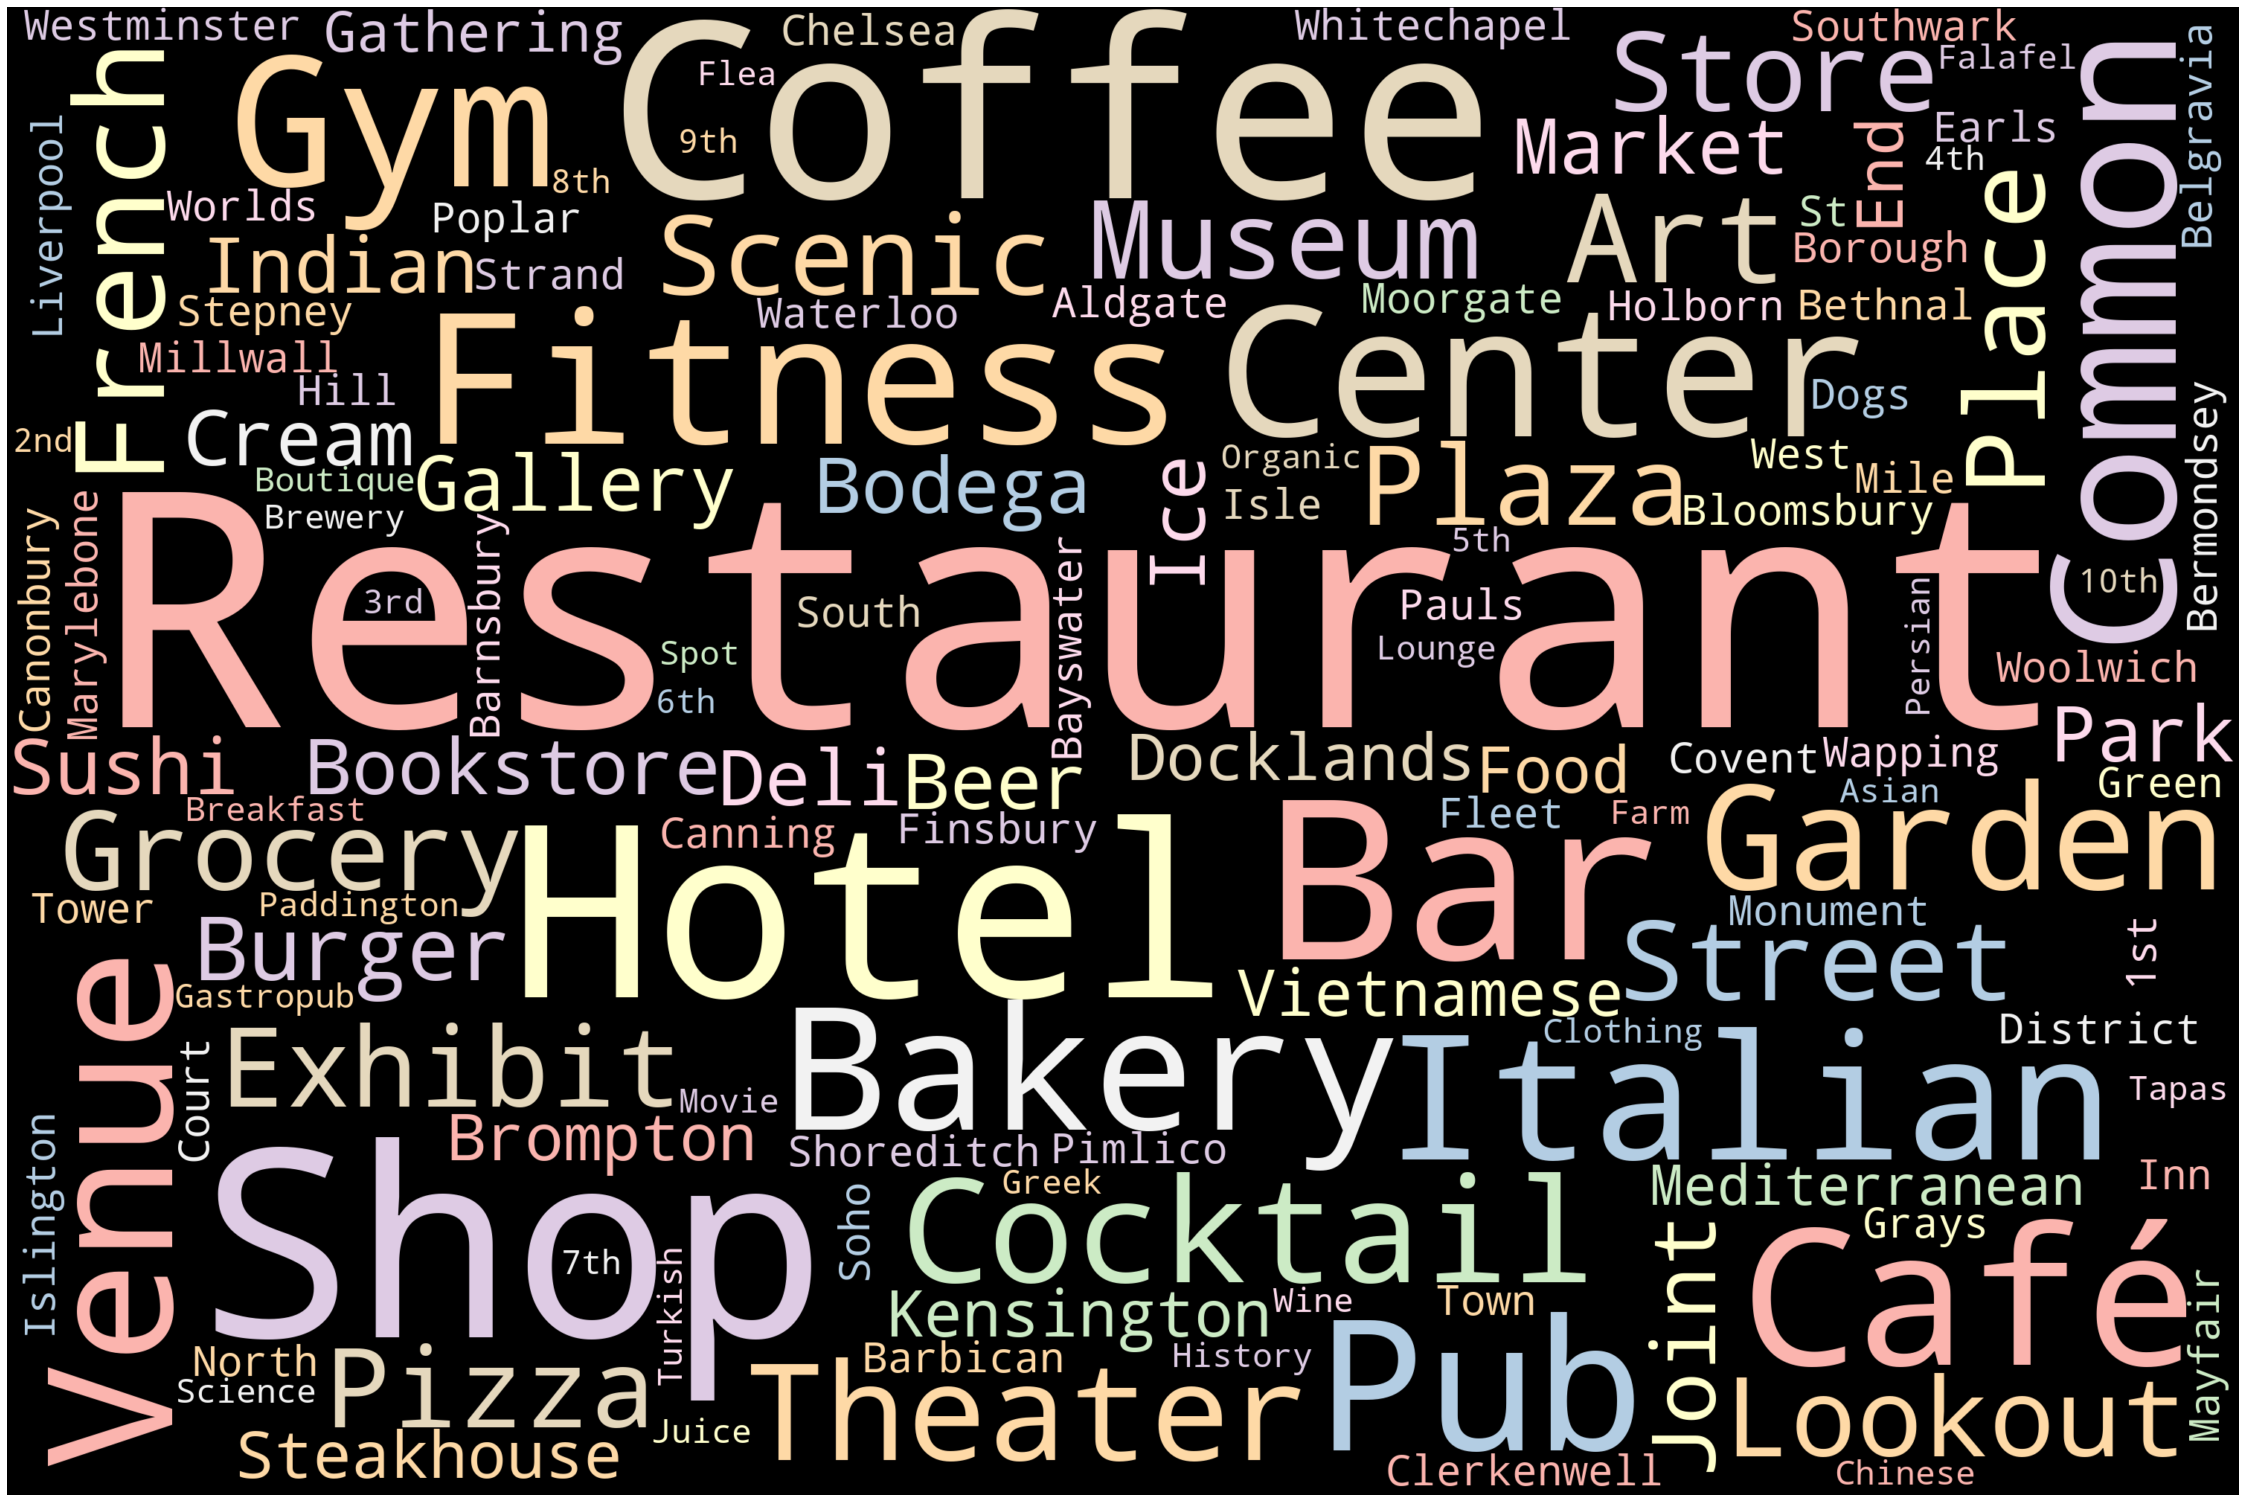

In [53]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster4 = london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 3, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]
text = df_cluster4

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 4**

In [54]:
london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 4, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]

District 1st Most Common Venue 2nd Most Common Venue  \
60  Abbey Wood           Supermarket         Grocery Store   
86  Thamesmead           Supermarket  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
60  Fast Food Restaurant                  Lake           Train Station   
86         Grocery Store       Warehouse Store  Furniture / Home Store   

   6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
60                 Trail  Eastern European Restaurant              Pharmacy   
86         Historic Site            Food & Drink Shop           Flea Market   

   9th Most Common Venue 10th Most Common Venue  
60              Platform        Warehouse Store  
86          Soccer Field      Mobile Phone Shop

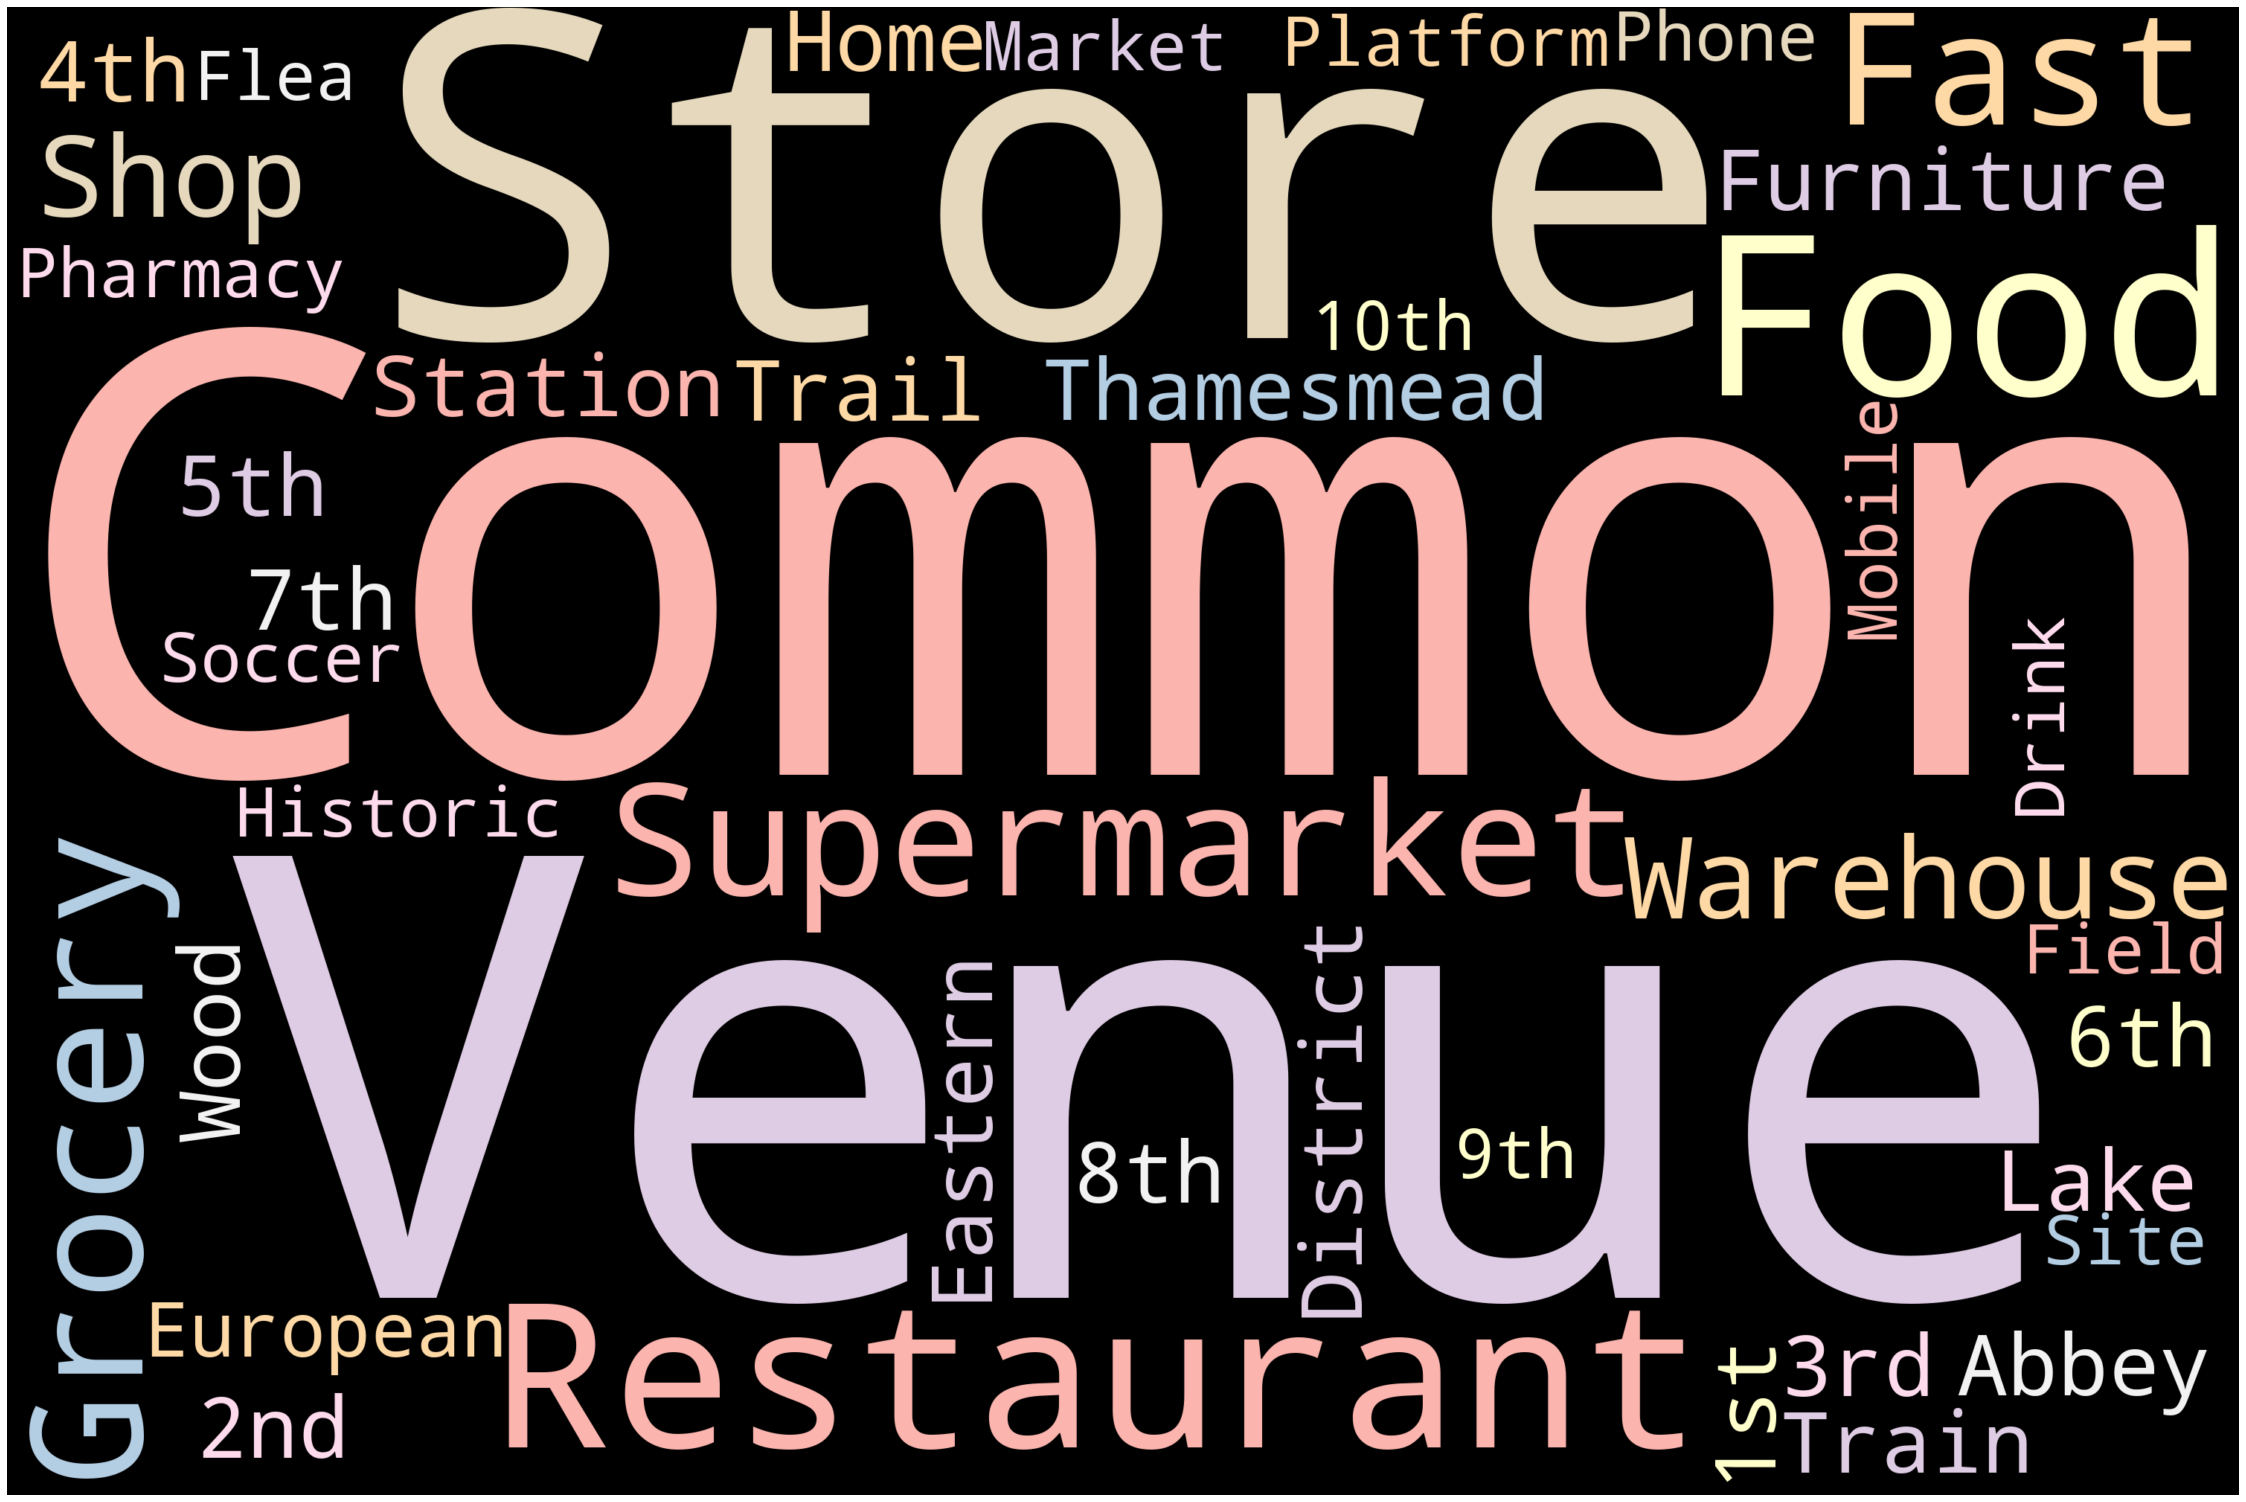

In [55]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster5 = london_merged_nonan.loc[london_merged_nonan['Cluster Labels'] == 4, london_merged_nonan.columns[[1] + list(range(5, london_merged_nonan.shape[1]))]]
text = df_cluster5

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 6. Results and Discussion <a name="results"></a>

The explanatory analysis revealed that there is a wide variety of venue categories in London city ranging from restaurants, bars, pubs, bakeries to bookstores, art museums, hotels, gyms and so on. It is important to highlight the presence of high number of train stations, which implies that London has a great connectivity to airports and surrounding cities, saving time and increasing mobility for visitors who spent an average of 4.8 nights in 2019 in London, according to Statista. However, as stated in the Business Problem section, a good planning is needed due to the high variety of activities and places to visit.

The scraping and data cleaning processes gave a total of 121 Postal Codes, which implies a total of 32 boroughs, while the London city map showed an uniform distribution of all the districts over London territory. A random analysis containing the most relevant revenues, from the point of view of a visitor, revealed that hotels, restaurants, bars and theaters are the most common venues in London city overall considering all districts. More specifically, the most popular international restaurants are: Italian (with 280 restaurants), Indian (with 167 restaurants), Turkish (with 142 restaurants) and Japanese (with 86 restaurants) in descending order. The difference between the total number of restaurants and the number of restaurants by cuisine type is mainly due to how each label has been categorized in the raw data.

A more detailed analysis of these venues by district has been performed. The districts Canning Town, North Woolwich and Docklands (situated in east and southeast of London city) have the highest hotel availability with a total of 16 hotels, while the districts Earls Court (southwest), Finsbury Park and Manor House (north) resulted in the districts with the highest italian restaurants availability with a total of 6 each. Moreover, the districts East Ham (east-northeast), Forest Gate (east) and Upton Park (northeast) have the highest availability of indian restaurants with a total of 7 each.

A word cloud analysis of the most common venues of all districts has been developed. The most frequent words found were: Restaurant, Pub, Park, Coffee, Store, Shop, Italian, Hotel, Bakery, Grocery, Gym. This word cloud analysis validates the random analysis previously performed but also revealed other common venues that had not been analyzed yet such as pubs, parks, coffee shops, bakeries, groceries and gyms. A clustering analysis has been performed using k-means algorithm setting 5 clusters (cluster 0, cluster 1, cluster 2, cluster 3, cluster 4) using word cloud to get the most common venues in each cluster. Overall, the most common words found in all clusters were: restaurant, hotel, bar, coffee, pub, grocery, fitness, park, bakery and supermarket validating the previous analyses performed in this respect.

### 6.1. Limitations and recommendations for further research

There are a number of gaps in the present project that could be benefitted from further research. The explanatory analysis results depend on the accuracy of Foursquare data and the Milesfaster website has limitations as per the number of postal codes included. Furthermore, a more detailed evaluation should have included prices and iconic attractions in London city such as Buckingham Palace and Big Ben.

## 7. Conclusion <a name="conclusion"></a>

London is one of the most popular tourist destinations in Europe with full of things to do and visit. Leaving aside iconic attractions such as Buckingham Palace and Big Ben, this project explored a large number of districts aiming to find the most common venues and where are located geographically. From the visitors perspective, the most relevant venues found in the explanatory analysis were hotels, restaurants, bars, theaters, pubs, bakeries, groceries, coffee shops, gyms. The most popular cuisine types were italian food, followed by indian food, turkish food and japanese food. To sum up, most hotels were found in districts located in southwest and north of London city, while most restaurants were found in districts located in east and northeast of London city. By clustering all the districts with the purpose of creating major zones of interest (including a bigger number of potential locations) it was found that most of the venues revealed during the explanatory analysis are located in London center, center-east, south and north periphery too.

Although the decision of the optimal potential places to visit in London city will be taken by visitors, it can be concluded considering the results of the explanatory analysis that the most common and popular venues are located in the center, center-east and south periphery of London city. This recommendation is based on additional factors such as proximity of iconic attractions, availability of train stations and closeness to city center.

*Note: Please click on the following link to visualize maps correctly*
[nbviewer link to this Jupyter Notebook](https://nbviewer.jupyter.org/github/jorgealvarezdlf/IBM_Data_Science_The_Battle_of_Neighborhoods_week2/blob/master/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods.ipynb)